# **Leitrura e Interpretação dos Dados ML**

## **Sumário**

- [1. Introdução](#1)
  - [1.1 Instalação de Pacotes Python](#11)
  - [1.2 Importação das Bibliotecas](#12)
- [2. Carregamento dos Dados](#2)
  - [2.1 Carregando Arquivo](#21)
  - [2.2. Tamanho do DataFrame](#22)
  - [2.2. Dados Faltantes ou Nulos](#22)
  - [2.4. Análise do tipo de dado](#24)
  - [2.5 Verificando o Alvo](#25)
- [3. Análise Exploratória dos Dados](#3)
  - [3.1. Tabelas de Estatística descritiva](#31)
    - [3.1.1. Analise das Tabelas descritica do Fósforo](#311)
    - [3.1.2. Analise das Tabelas descritica do Nitrogênio](#312)
    - [3.1.3. Analise das Tabelas descritica do Potássio](#313)
    - [3.1.4. Analise das Tabelas descritica do Humidade](#314)
    - [3.1.5. Analise das Tabelas descritica do Tremperatura](#315)
    - [3.1.6. Analise das Tabelas descritica do ph](#316)
    - [3.1.7. Analise das Tabelas descritica do Precipitação](#317)
  - [3.2. Visualizacao Gráfica](#32)
    - [3.2.1. Histograma do Nitrogênio](#321)
    - [3.2.2. Boxplot do Nitrogênio](#322)
    - [3.2.3. Histograma Potássio](#323)
    - [3.2.4. Boxplot do Potássio](#324)
    - [3.2.5. Histograma do Fósforo](#325)
    - [3.2.6. Boxplot do Fósforo](#326)
    - [3.2.7. Matriz de Correlação Linear](#327)
    - [3.2.8. Gráfico Linear](#328)
    - [3.2.9. Boxplot de Precipitação de Chuva](#329)
  - [3.3. Análise de Perfil Ideal](#33)
    - [3.3.1. Relatório de resultados da análise de perfil ideal](#331)
- [4. Modelagem Preditiva](#4)
  - [4.1. Separando o Modelo para Treino e Teste](#41)
  - [4.2. Modelo de Regressão Logistica](#42)
  - [4.3. Modelo de Árvore de Decisão](#43)
  - [4.4. Modelo de Floresta Aleatória](#43)
  - [4.5. Modelo de K-Nearest Neoghbeils (KNN)](#44)
  - [4.6. Modelo de Regressão Linear](#43)
  - [4.7. Modelo de Máquina de Vetor de Suporte](#43)
  - [4.8. Comparando Modelos](#43)
- [5. Conclusão](#5-conclusao)


<a id='1'></a>
## **1. Introdução**

As planilhas apresentadas contêm dados detalhados sobre a perda de cobertura florestal e o estoque de carbono em diferentes níveis territoriais no Brasil. Essas informações são essenciais para monitorar o desmatamento, avaliar os impactos ambientais e entender a dinâmica dos recursos florestais ao longo do tempo.

Os dados incluem:

Perda de cobertura florestal (tree cover loss): Medem a redução da área florestal em hectares, segmentados por país, estados (subnacional 1) e municípios ou regiões menores (subnacional 2). Essas perdas são reportadas ano a ano, permitindo analisar tendências de desmatamento desde 2001 até 2024.
Estoque e fluxo de carbono (carbon data): Apresentam os estoques de carbono armazenados na biomassa acima do solo e as emissões e remoções líquidas de carbono associadas às mudanças na cobertura florestal. Estes dados ajudam a compreender o impacto do desmatamento e da regeneração florestal no balanço de gases de efeito estufa.
Essas informações são fundamentais para políticas ambientais, estratégias de conservação e para o cumprimento de metas relacionadas às mudanças climáticas, como os compromissos internacionais de redução de emissões de carbono.


<a id='11'></a>
### **1.1. Instalação de Pacotes Python**

In [23]:
#import sys
#!{sys.executable} -m pip install openpyxl
#!conda install pandas -y
# !pip install seaborn
#!pip install matplotlib
#!pip install scipy
#!pip install scikit-learn

<a id='12'></a>
### **1.2. Importação das Bibliotecas** 

In [11]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Estatísticas e operações matemáticas
from statistics import mode, StatisticsError
from scipy import stats

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Ambientes interativos
from IPython.display import display

# Controle de avisos
import warnings
warnings.filterwarnings("ignore")

# Machine Learning - Pré-processamento e treino/teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Avaliação de modelos
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

<a id='2'></a>
## **2. Carregando Dados**

<a id='21'></a>
### **2.1. Carregando Arquivo**

### Planilhas encontradas:

* Read\_Me — Leia-me (informações sobre os dados)
* Country tree cover loss — Perda de cobertura arbórea por país
* Country carbon data — Dados de carbono por país
* Subnational 1 tree cover loss — Perda de cobertura arbórea por subdivisão regional 1
* Subnational 1 carbon data — Dados de carbono por subdivisão regional 1
* Subnational 2 tree cover loss — Perda de cobertura arbórea por subdivisão regional 2
* Subnational 2 carbon data — Dados de carbono por subdivisão regional 2

---

### Planilha: Read\_Me

**Conteúdo:** Informação geral, provavelmente sobre os dados ou a metodologia. (Aqui está vazio, só com a palavra "About" = "Sobre")

---

### Planilha: Country tree cover loss (Perda de cobertura arbórea por país)

| Coluna              | Tradução                                           |
| ------------------- | -------------------------------------------------- |
| country             | país                                               |
| threshold           | limiar (nível de densidade da cobertura)           |
| area\_ha            | área em hectares                                   |
| extent\_2000\_ha    | extensão em hectares no ano 2000                   |
| extent\_2010\_ha    | extensão em hectares no ano 2010                   |
| gain\_2000-2012\_ha | ganho de área 2000-2012 (ha)                       |
| tc\_loss\_ha\_2001  | perda de cobertura arbórea em hectares no ano 2001 |
| tc\_loss\_ha\_2002  | perda em 2002                                      |
| ...                 | ...                                                |
| tc\_loss\_ha\_2024  | perda em 2024                                      |

---

### Planilha: Country carbon data (Dados de carbono por país)

| Coluna                                                     | Tradução                                                            |
| ---------------------------------------------------------- | ------------------------------------------------------------------- |
| country                                                    | país                                                                |
| umd\_tree\_cover\_density\_2000\_\_threshold               | densidade da cobertura arbórea em 2000 (limiar)                     |
| umd\_tree\_cover\_extent\_2000\_\_ha                       | extensão da cobertura arbórea em 2000 (ha)                          |
| gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C            | estoque de carbono acima do solo em 2000 (Mg de carbono)            |
| avg\_gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C\_ha-1 | estoque médio de carbono acima do solo por hectare                  |
| gfw\_forest\_carbon\_gross\_emissions\_\_Mg\_CO2e\_yr-1    | emissões brutas de carbono da floresta (Mg CO2 equivalente por ano) |
| gfw\_forest\_carbon\_gross\_removals\_\_Mg\_CO2\_yr-1      | remoções brutas de carbono da floresta (Mg CO2 por ano)             |
| gfw\_forest\_carbon\_net\_flux\_\_Mg\_CO2e\_yr-1           | fluxo líquido de carbono da floresta (Mg CO2e por ano)              |
| gfw\_forest\_carbon\_gross\_emissions\_2001\_\_Mg\_CO2e    | emissões brutas em 2001                                             |
| ...                                                        | ...                                                                 |
| gfw\_forest\_carbon\_gross\_emissions\_2024\_\_Mg\_CO2e    | emissões brutas em 2024                                             |

---

### Planilha: Subnational 1 tree cover loss (Perda de cobertura arbórea subdivisão regional 1)

| Coluna              | Tradução                                 |
| ------------------- | ---------------------------------------- |
| country             | país                                     |
| subnational1        | subdivisão regional nível 1              |
| threshold           | limiar (nível de densidade da cobertura) |
| area\_ha            | área em hectares                         |
| extent\_2000\_ha    | extensão em hectares no ano 2000         |
| extent\_2010\_ha    | extensão em hectares no ano 2010         |
| gain\_2000-2012\_ha | ganho 2000-2012 (ha)                     |
| tc\_loss\_ha\_2001  | perda em hectares no ano 2001            |
| ...                 | ...                                      |
| tc\_loss\_ha\_2024  | perda em hectares no ano 2024            |

---

### Planilha: Subnational 1 carbon data (Dados de carbono subdivisão regional 1)

| Coluna                                                     | Tradução                                        |
| ---------------------------------------------------------- | ----------------------------------------------- |
| country                                                    | país                                            |
| subnational1                                               | subdivisão regional nível 1                     |
| umd\_tree\_cover\_density\_2000\_\_threshold               | densidade da cobertura em 2000 (limiar)         |
| umd\_tree\_cover\_extent\_2000\_\_ha                       | extensão da cobertura em 2000 (ha)              |
| gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C            | estoque de carbono acima do solo em 2000 (Mg C) |
| avg\_gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C\_ha-1 | estoque médio de carbono por hectare            |
| gfw\_forest\_carbon\_gross\_emissions\_\_Mg\_CO2e\_yr-1    | emissões brutas anuais de carbono (Mg CO2e)     |
| gfw\_forest\_carbon\_gross\_removals\_\_Mg\_CO2\_yr-1      | remoções brutas anuais de carbono (Mg CO2)      |
| gfw\_forest\_carbon\_net\_flux\_\_Mg\_CO2e\_yr-1           | fluxo líquido anual de carbono (Mg CO2e)        |
| gfw\_forest\_carbon\_gross\_emissions\_2001\_\_Mg\_CO2e    | emissões brutas 2001                            |
| ...                                                        | ...                                             |
| gfw\_forest\_carbon\_gross\_emissions\_2024\_\_Mg\_CO2e    | emissões brutas 2024                            |

---

### Planilha: Subnational 2 tree cover loss (Perda de cobertura arbórea subdivisão regional 2)

| Coluna              | Tradução                         |
| ------------------- | -------------------------------- |
| country             | país                             |
| subnational1        | subdivisão regional nível 1      |
| subnational2        | subdivisão regional nível 2      |
| threshold           | limiar (densidade da cobertura)  |
| area\_ha            | área em hectares                 |
| extent\_2000\_ha    | extensão em hectares no ano 2000 |
| extent\_2010\_ha    | extensão em hectares no ano 2010 |
| gain\_2000-2012\_ha | ganho de área 2000-2012 (ha)     |
| tc\_loss\_ha\_2001  | perda em 2001                    |
| ...                 | ...                              |
| tc\_loss\_ha\_2024  | perda em 2024                    |

---

### Planilha: Subnational 2 carbon data (Dados de carbono subdivisão regional 2)

| Coluna                                                     | Tradução                                     |
| ---------------------------------------------------------- | -------------------------------------------- |
| country                                                    | país                                         |
| subnational1                                               | subdivisão regional nível 1                  |
| subnational2                                               | subdivisão regional nível 2                  |
| umd\_tree\_cover\_density\_2000\_\_threshold               | densidade da cobertura 2000 (limiar)         |
| umd\_tree\_cover\_extent\_2000\_\_ha                       | extensão da cobertura 2000 (ha)              |
| gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C            | estoque de carbono acima do solo 2000 (Mg C) |
| avg\_gfw\_aboveground\_carbon\_stocks\_2000\_\_Mg\_C\_ha-1 | estoque médio por hectare                    |
| gfw\_forest\_carbon\_gross\_emissions\_\_Mg\_CO2e\_yr-1    | emissões brutas anuais de carbono            |
| gfw\_forest\_carbon\_gross\_removals\_\_Mg\_CO2\_yr-1      | remoções brutas anuais de carbono            |
| gfw\_forest\_carbon\_net\_flux\_\_Mg\_CO2e\_yr-1           | fluxo líquido anual de carbono               |
| gfw\_forest\_carbon\_gross\_emissions\_2001\_\_Mg\_CO2e    | emissões brutas 2001                         |
| ...                                                        | ...                                          |
| gfw\_forest\_carbon\_gross\_emissions\_2024\_\_Mg\_CO2e    | emissões brutas 2024                         |


In [19]:
import os

caminho_arquivo = '/Users/francismaralvesmartinsjunior/Documents/GitHub/Global-Solution-2025-1/ml/data/raw/BRA-2.xlsx'

if not os.path.isfile(caminho_arquivo):
    print("Arquivo não encontrado no caminho:", caminho_arquivo)
else:
    planilhas = pd.read_excel(caminho_arquivo, sheet_name=None)
    print("Planilhas encontradas:")
    for nome in planilhas.keys():
        print(f" - {nome}")

    for nome, df in planilhas.items():
        print(f"\nPlanilha: {nome}")
        display(df.head())  # Use print se estiver rodando em script normal


Planilhas encontradas:
 - Read_Me
 - Country tree cover loss
 - Country carbon data
 - Subnational 1 tree cover loss
 - Subnational 1 carbon data
 - Subnational 2 tree cover loss
 - Subnational 2 carbon data

Planilha: Read_Me


,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,About,NaN



Planilha: Country tree cover loss


,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_2024
0,Brazil,0,850907198,850907198,850907198,8066542,2933201,3715945,3489258,4133606,...,2925679,6407238,5559046,3785527,3475769,4133235,3902719,4275317,4101572,5379616
1,Brazil,10,850907198,548311110,522889418,8066542,2807288,3570827,3316863,3926590,...,2343840,5564327,4689031,3080681,2819693,3432505,3140510,3474818,3015745,4543211
2,Brazil,15,850907198,541360375,517622112,8066542,2794124,3556840,3300848,3907915,...,2319719,5526473,4652090,3053004,2793763,3403335,3109911,3441056,2974383,4511676
3,Brazil,20,850907198,532270848,512569845,8066542,2775101,3537911,3280837,3886289,...,2285990,5473802,4604178,3014380,2758774,3363186,3066760,3392872,2912187,4466962
4,Brazil,25,850907198,526491273,506370240,8066542,2761540,3524252,3266865,3870986,...,2261163,5435004,4570358,2988110,2733724,3334168,3035925,3359243,2869594,4436572



Planilha: Country carbon data


,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e,gfw_forest_carbon_gross_emissions_2024__Mg_CO2e
0,Brazil,0,850907198,56543737422,290,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brazil,10,548311110,56375913189,495,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brazil,15,541360375,56184179971,502,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brazil,20,532270848,55933327004,510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brazil,25,526491273,55773394246,517,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Planilha: Subnational 1 tree cover loss


,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_2024
0,Brazil,Acre,0,16427138,16427138,16427138,70405,69818,70922,38835,...,53906,98262,96050,93653,93143,99445,130478,157262,69633,99626
1,Brazil,Acre,10,16427138,15594068,15302941,70405,69463,70802,38722,...,51807,91897,91052,89844,90364,95434,125248,150881,65562,95229
2,Brazil,Acre,15,16427138,15569708,15275874,70405,69415,70784,38707,...,51659,91412,90663,89547,90161,95141,124883,150434,65309,94959
3,Brazil,Acre,20,16427138,15546341,15267843,70405,69345,70763,38685,...,51514,90957,90298,89258,89972,94864,124529,150013,65080,94705
4,Brazil,Acre,25,16427138,15533426,15238749,70405,69287,70744,38667,...,51428,90701,90099,89088,89864,94703,124343,149784,64957,94568



Planilha: Subnational 1 carbon data


,country,subnational1,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e,gfw_forest_carbon_gross_emissions_2024__Mg_CO2e
0,Brazil,Acre,0,16427138,2505627672,453,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brazil,Acre,10,15594068,2503780037,478,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brazil,Acre,15,15569708,2503058154,478,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brazil,Acre,20,15546341,2502356692,479,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brazil,Acre,25,15533426,2501950028,479,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Planilha: Subnational 2 tree cover loss


,country,subnational1,subnational2,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_2024
0,Brazil,Acre,Acrelândia,0,180870,180870,180870,1003,5881,4176,...,2277,4001,3351,1959,2566,1808,4126,3564,2123,2894
1,Brazil,Acre,Acrelândia,10,180870,140604,106065,1003,5820,4161,...,2154,3658,3219,1877,2485,1744,3764,3276,2004,2791
2,Brazil,Acre,Acrelândia,15,180870,139950,104438,1003,5817,4159,...,2148,3639,3209,1873,2479,1739,3748,3266,1999,2785
3,Brazil,Acre,Acrelândia,20,180870,139224,104145,1003,5809,4158,...,2142,3619,3200,1868,2474,1734,3730,3258,1994,2780
4,Brazil,Acre,Acrelândia,25,180870,138813,102079,1003,5801,4156,...,2139,3609,3194,1866,2470,1732,3721,3253,1989,2776



Planilha: Subnational 2 carbon data


,country,subnational1,subnational2,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,...,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e,gfw_forest_carbon_gross_emissions_2024__Mg_CO2e
0,Brazil,Acre,Acrelândia,0,180870,17570460,173,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brazil,Acre,Acrelândia,10,140604,17497510,238,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brazil,Acre,Acrelândia,15,139950,17480173,239,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brazil,Acre,Acrelândia,20,139224,17460819,240,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brazil,Acre,Acrelândia,25,138813,17448484,241,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="22"></a>
### **2.2. Tamanho do DataFrame**

O primeiro passo em qualquer análise de dados é entender a estrutura do conjunto de dados disponível. Para isso, utilizamos o comando:

```python
df.shape
```

In [20]:
# Indica qual o "tamanho" o DataFrame (linhas, colunas)
df.shape

(44576, 34)

<a id='23'></a>
### **2.3. Dados Faltantes ou Nulos**

Uma etapa fundamental na preparação dos dados é verificar se existem **valores ausentes (nulos)** nas colunas do DataFrame. Para isso, utilizamos comandos como:

```python
df.isnull().sum()
```

In [21]:
# Exiber se tem dados faltantes ou nulos
df.isnull().sum()  # Retorna a soma de valores nulos em cada coluna do DataFrame

country                                              0
subnational1                                         0
subnational2                                         0
umd_tree_cover_density_2000__threshold               0
umd_tree_cover_extent_2000__ha                       0
gfw_aboveground_carbon_stocks_2000__Mg_C             0
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1    0
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1      0
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1        0
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1             0
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2007__Mg_CO2e      0
gfw_forest_carbon_gross_emissions_2008__Mg_CO2e      0
gfw_forest

### Interpretação dos Dados

A lista apresentada mostra a contagem de valores faltantes (missing values) para cada coluna de uma planilha que contém dados de carbono florestal por país, estados e municípios. O valor **0** para todas as colunas indica que **não há dados ausentes em nenhuma das variáveis**, ou seja, o conjunto de dados está completo.

As colunas incluem:

* Informações geográficas: `country`, `subnational1`, `subnational2`.
* Dados sobre a densidade e extensão da cobertura florestal no ano 2000.
* Estoque de carbono acima do solo em megagramas de carbono (Mg\_C).
* Médias de estoque de carbono por hectare.
* Emissões brutas, remoções e fluxo líquido de carbono, incluindo valores específicos ano a ano de 2001 a 2024.

### Conclusão

A ausência de dados faltantes é um ponto positivo, pois indica que a base está íntegra e pronta para análises confiáveis. Isso permite:

* Realizar análises temporais do balanço de carbono florestal sem preocupações com lacunas.
* Avaliar com precisão as emissões e remoções de carbono associadas ao desmatamento e regeneração florestal.
* Usar o conjunto de dados para apoiar tomadas de decisão, como políticas ambientais e planos de conservação florestal.

Assim, o conjunto de dados oferece uma base sólida para monitoramento e estudos ambientais relacionados ao carbono florestal no Brasil, permitindo análises detalhadas em diferentes escalas territoriais.


<a id='24'></a>
### **2.4. Análise do tipo de dado**

A seguir, analisamos os tipos de dados de cada coluna do DataFrame utilizando:

```python
df.dtypes


In [22]:
# Apresenta qual tipo de dado por variável
df.dtypes

country                                              object
subnational1                                         object
subnational2                                         object
umd_tree_cover_density_2000__threshold                int64
umd_tree_cover_extent_2000__ha                        int64
gfw_aboveground_carbon_stocks_2000__Mg_C              int64
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1     int64
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1       int64
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1         int64
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1              int64
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e       int64
gfw_forest_carbon_gross_emissions_2007__

### Interpretação dos Tipos de Dados

O conjunto de dados apresenta colunas com os seguintes tipos:

* **Objetos (strings):**

  * `country`, `subnational1`, `subnational2`: representam dados categóricos, como nomes de países, estados (subnacionais 1) e regiões menores ou municípios (subnacionais 2). São informações textuais que identificam as áreas geográficas.

* **Inteiros (int64):**

  * Variáveis relacionadas a métricas quantitativas de cobertura florestal, estoques de carbono e emissões/remoções de carbono florestal.
  * Por exemplo:

    * `umd_tree_cover_density_2000__threshold`: indica densidade de cobertura de árvores no ano 2000.
    * `umd_tree_cover_extent_2000__ha`: extensão da cobertura em hectares.
    * `gfw_aboveground_carbon_stocks_2000__Mg_C`: estoque de carbono acima do solo em megagramas (Mg).
    * `gfw_forest_carbon_gross_emissions_*`: emissões brutas anuais em megagramas de CO₂ equivalente.
    * `gfw_forest_carbon_gross_removals__Mg_CO2_yr-1`: remoções brutas anuais de carbono.
    * `gfw_forest_carbon_net_flux__Mg_CO2e_yr-1`: fluxo líquido de carbono (diferença entre emissões e remoções).

O uso de inteiros indica que esses dados são numéricos e provavelmente representam medições acumuladas ou totais.

### Conclusão

* A presença de dados categóricos geográficos permite segmentar e analisar as métricas ambientais por região, possibilitando análises detalhadas em diferentes níveis administrativos.
* Os dados numéricos em formato inteiro indicam que o conjunto contém valores discretos e acumulativos, importantes para análises de tendência temporal e monitoramento do carbono florestal.
* A estrutura dos dados, com medidas ano a ano, facilita o acompanhamento das mudanças nas emissões e remoções de carbono florestal ao longo do tempo.
* Como esses dados são fundamentalmente quantitativos, podem ser usados para modelagem estatística, identificação de padrões, e suporte a políticas de conservação e sustentabilidade.


<a id='25'></a>
### **2.5. Verificando o Alvo**

O comando `df[['label']].value_counts()` retornou a frequência de ocorrência de cada cultura agrícola no conjunto de dados. Isso nos mostra **quantas amostras existem para cada tipo de cultura** presente no dataset.

In [ ]:
# Retorna uma série contendo a frequência de cada linha distinta no Dataframe
df_s = df[['label']].value_counts()
df_s

label      
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
Name: count, dtype: int64

**Interpretação dos resultados:**

A contagem de frequência para cada cultura agrícola (`label`) mostra que:

- Todas as culturas possuem exatamente **100 amostras**
- Nenhuma cultura está sub-representada ou sobre-representada
- Isso indica que o conjunto de dados está **totalmente balanceado**

Exemplo da saída:

```

apple          100
banana         100
blackgram      100
chickpea       100
...
rice           100
watermelon     100

```

**Conclusão:**

O dataset contém **22 culturas diferentes**, com **100 registros para cada uma**. Isso garante uma **distribuição equilibrada**, o que é ideal para a criação de modelos de machine learning.  
Como não há desequilíbrio entre as classes, **não será necessário aplicar técnicas de balanceamento** (como oversampling ou undersampling). O modelo terá condições justas para aprender e prever corretamente qualquer uma das culturas disponíveis.


<a id='3'></a>
## **3. Análise Exploratória dos dados** 

<a id="31"></a>
### **3.1 Tabelas de Estatística Descritiva**


Este código realiza uma análise estatística das variáveis numéricas do dataset, agrupadas por tipo de cultura (coluna `label`). O objetivo é entender como cada variável se comporta para diferentes culturas.

#### Etapas do Código

Esse comando calcula estatísticas descritivas como **média**, **desvio padrão**, **mínimo**, **máximo**, **quartis**, etc., para cada variável numérica, separando por tipo de cultura.

#### Exibição das Variáveis

O código abaixo imprime separadamente os dados descritivos para cada variável:

#### Finalidade

Essa análise ajuda a:

* Comparar os requisitos de **nutrientes do solo (N, P, K)** por cultura.
* Entender as **condições climáticas ideais** (chuva, temperatura, umidade) para cada tipo.
* Tomar decisões baseadas em dados para **recomendar culturas adequadas ao ambiente analisado**.


In [ ]:
# Realizando a análise descritiva separada por cada 'label'
descricao_por_label = df.groupby('label').describe()

# Exibindo o resultadO PARA FAZER ANALISE REFERENTE AOS OUTROS TIPOS DE colunas e só escolher 
# (N, P, K, temperature, humildaty, ph, rainfall, label,  
print("============================ Fósforo =============================")
display(descricao_por_label["P"]) # Fósforo
print("============================ Nitrogenio ===========================")
display(descricao_por_label["N"]) # Nitrogenio
print("============================ Potassio =============================")
display(descricao_por_label["K"]) # Potassio
print("============================ Humidade =============================")
display(descricao_por_label["humidity"]) # Humidade
print("============================ Temperatura ===========================")
display(descricao_por_label["temperature"]) # Temperatura
print("============================ pH ====================================")
display(descricao_por_label["ph"]) # pH
print("============================ Chuva ==================================")
display(descricao_por_label["rainfall"]) # Chuva

============================ Fósforo =============================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,134.22,8.139665,120.0,126.75,136.5,141.00,145.0
banana,100.0,82.01,7.690339,70.0,75.00,81.0,88.00,95.0
blackgram,100.0,67.47,7.151259,55.0,62.00,67.0,74.00,80.0
chickpea,100.0,67.79,7.498545,55.0,61.00,68.0,74.00,80.0
coconut,100.0,16.93,8.357244,5.0,9.75,15.5,24.25,30.0
coffee,100.0,28.74,7.276113,15.0,23.00,29.0,34.25,40.0
cotton,100.0,46.24,7.348634,35.0,40.00,46.0,52.00,60.0
grapes,100.0,132.53,7.619029,120.0,125.75,133.0,139.00,145.0
jute,100.0,46.86,7.195706,35.0,41.00,46.0,53.25,60.0


============================ Nitrogenio ===========================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,20.80,11.863704,0.0,10.00,24.0,30.00,40.0
banana,100.0,100.23,11.107241,80.0,92.00,100.5,108.25,120.0
blackgram,100.0,40.02,12.664258,20.0,28.75,41.0,52.00,60.0
chickpea,100.0,40.09,12.150649,20.0,30.00,39.0,52.00,60.0
coconut,100.0,21.98,11.761931,0.0,13.75,24.0,31.00,40.0
coffee,100.0,101.20,12.345203,80.0,89.00,103.0,112.00,120.0
cotton,100.0,117.77,11.628817,100.0,107.75,117.0,127.50,140.0
grapes,100.0,23.18,12.466829,0.0,11.75,24.0,35.00,40.0
jute,100.0,78.40,10.968274,60.0,70.00,78.0,88.25,100.0


============================ Potassio =============================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,199.89,3.320871,195.0,197.00,200.0,203.00,205.0
banana,100.0,50.05,3.382591,45.0,47.00,50.0,53.00,55.0
blackgram,100.0,19.24,3.188109,15.0,16.75,19.0,22.00,25.0
chickpea,100.0,79.92,3.261901,75.0,77.00,79.0,83.00,85.0
coconut,100.0,30.59,2.998636,25.0,29.00,31.0,33.00,35.0
coffee,100.0,29.94,3.246817,25.0,27.00,30.0,33.00,35.0
cotton,100.0,19.56,3.169680,15.0,17.00,19.0,22.00,25.0
grapes,100.0,200.11,3.265662,195.0,197.00,201.0,203.00,205.0
jute,100.0,39.99,3.313563,35.0,37.00,40.0,43.00,45.0


============================ Humidade =============================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,92.333383,1.458551,90.025751,90.970127,92.416541,93.509252,94.920481
banana,100.0,80.358123,2.805481,75.031933,78.062229,80.223599,82.960240,84.978492
blackgram,100.0,65.118426,2.798326,60.065349,63.040532,65.026723,67.741171,69.961000
chickpea,100.0,16.860439,1.711979,14.258040,15.392700,16.658634,18.265986,19.969789
coconut,100.0,94.844272,2.686329,90.017345,92.544995,94.960581,96.759684,99.981876
coffee,100.0,58.869846,5.838566,50.045570,53.814433,57.648083,63.579586,69.948073
cotton,100.0,79.843474,3.050955,75.005393,77.035008,80.010893,82.364946,84.876690
grapes,100.0,81.875228,1.177111,80.016394,80.859457,81.724647,82.899224,83.983517
jute,100.0,79.639864,5.507798,70.882596,74.588266,79.469205,83.232826,89.891065


============================ Temperatura ===========================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,22.630942,0.827404,21.036527,22.163206,22.628290,23.344066,23.996862
banana,100.0,27.376798,1.428359,25.010185,26.108408,27.443333,28.657735,29.908885
blackgram,100.0,29.973340,2.686357,25.097374,27.822763,29.655515,32.379701,34.946616
chickpea,100.0,18.872847,1.169838,17.024985,17.877953,18.878291,19.711637,20.995022
coconut,100.0,27.409892,1.385734,25.008724,26.268718,27.385317,28.600213,29.869083
coffee,100.0,25.540477,1.502635,23.059519,24.218563,25.656643,26.744956,27.923744
cotton,100.0,23.988958,1.135681,22.000851,23.017615,23.964997,24.973735,25.992374
grapes,100.0,23.849575,9.738649,8.825675,16.206523,23.018528,30.823648,41.948657
jute,100.0,24.958376,1.185138,23.094338,23.886729,24.971106,25.894852,26.985822


============================ pH ====================================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,5.929663,0.268932,5.514253,5.705800,5.885818,6.135616,6.499227
banana,100.0,5.983893,0.270650,5.505394,5.740712,5.994462,6.211092,6.490074
blackgram,100.0,7.133952,0.372533,6.500145,6.812736,7.165240,7.419390,7.775306
chickpea,100.0,7.336957,0.801127,5.988993,6.603967,7.356537,7.861625,8.868741
coconut,100.0,5.976562,0.287632,5.501580,5.731053,5.990709,6.209201,6.470466
coffee,100.0,6.790308,0.417132,6.020947,6.429728,6.798626,7.132105,7.493192
cotton,100.0,6.912675,0.627170,5.801048,6.364399,6.840957,7.426792,7.994680
grapes,100.0,6.025937,0.298265,5.510925,5.776854,6.001785,6.313711,6.499605
jute,100.0,6.732778,0.446349,6.002525,6.348010,6.711500,7.126526,7.488014


============================ Chuva ==================================


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
apple,100.0,112.654779,7.102985,100.117344,106.070135,112.979230,118.449546,124.983162
banana,100.0,104.626980,9.398150,90.109781,96.471109,105.007750,112.092171,119.847970
blackgram,100.0,67.884151,4.184186,60.417903,64.049755,68.293539,71.397924,74.915595
chickpea,100.0,80.058977,7.944350,65.113656,73.610409,79.692282,85.824482,94.781896
coconut,100.0,175.686646,29.472333,131.090008,149.126478,171.999922,202.351490,225.632366
coffee,100.0,158.066295,25.695086,115.156401,136.011746,157.770963,181.472018,199.473564
cotton,100.0,80.398043,11.231812,60.653817,70.894298,80.237095,90.418270,99.931008
grapes,100.0,69.611829,2.951759,65.010953,66.836826,69.536186,71.609366,74.915062
jute,100.0,174.792798,15.078367,150.235524,161.090683,175.590814,187.641532,199.836291


<a id='311'></a>
####  **3.1.1 Análise Descritiva — Fósforo (P) por Tipo de Cultura**

Este relatório apresenta uma análise dos níveis de **fósforo (P)** no solo para diferentes culturas agrícolas. A análise foi realizada com base em estatísticas descritivas (média, desvio padrão, mínimo, máximo e quartis).

#### **Conclusão Geral**

*  **Maçã e uva** são as culturas com **maior exigência de fósforo**, indicando a necessidade de solos bem adubados com este nutriente.
* **Banana** e **papaya** apresentam uma demanda **acima da média**, mas ainda inferior à da maçã e uva.
* **Leguminosas (grão-de-bico, feijões, lentilha, etc.)** mostram **baixa exigência**, o que é esperado devido à sua adaptação a solos com menos nutrientes.
* **Cereais (arroz, milho)** e outras como **algodão, jute, mungbean** têm **demanda moderada**, exigindo atenção média à adubação fosfatada.
* **Coco, laranja, melão, romã, etc.** apresentam **muito baixa necessidade de fósforo**, sendo ideais para solos mais pobres nesse nutriente.

<a id='312'></a>
#### **3.1.2 Análise Descritiva — Nitrogênio (N) por Tipo de Cultura**

A seguir, temos a análise da concentração de **nitrogênio no solo** para diferentes culturas. O nitrogênio é um macronutriente essencial para o crescimento vegetativo das plantas.

#### **Conclusão Geral**

*  **Culturas como algodão, banana, melancia, café e melão** têm uma **altíssima exigência de nitrogênio**, o que requer fertilização constante com foco nesse nutriente.
*  **Cereais (arroz, milho, juta)** demandam **níveis elevados**, mas menores que os anteriores.
*  **Papaya** está no grupo **intermediário**, com demanda **moderada**.
*  **Leguminosas (feijões, lentilha, grão-de-bico, etc.)**, além de frutas como **maçã, manga, uva, laranja**, apresentam **baixa a muito baixa exigência de nitrogênio**.

  * Isso pode ser explicado pela capacidade de **fixação biológica de nitrogênio** em leguminosas e o menor crescimento vegetativo exigido por frutas.

<a id='313'></a>
#### **3.1.3. Análise Descritiva — Potássio (K) por Tipo de Cultura**

O potássio é um nutriente essencial para a **regulação hídrica, fotossíntese e resistência a doenças**. A necessidade varia conforme o tipo de planta e seus processos fisiológicos.

#### **Conclusão Geral**

* **Maça e grapes** são culturas com **altíssima exigência de potássio**, indicando forte necessidade de suplementação para desempenho ótimo.
* Frutas como **banana, mamão, melancia e melão** possuem **exigência moderada**, demandando atenção regular.
* **Chickpea** se destaca com um nível alto, indicando importância do potássio mesmo em leguminosas específicas.
* **Café, coco e manga** têm **baixa exigência**, mas não desprezível — fertilizações balanceadas são ideais.
* **Laranja** e leguminosas como **feijões, lentilha, grão-de-bico, etc.**, além de culturas como **algodão e milho**, possuem **baixa a muito baixa exigência de potássio**, o que permite práticas mais econômicas quanto a esse nutriente.

<a id='314'></a>
#### **3.1.4. Análise Descritiva — Umidade por Tipo de Cultura**

Este relatório apresenta uma análise dos níveis de **umidade (%)** para diferentes culturas agrícolas. A análise foi realizada com base em estatísticas descritivas (média, desvio padrão, mínimo, máximo e quartis), com foco na exigência hídrica de cada cultura.

#### **Conclusão Geral**

*  **Culturas como coco, maçã, mamão, melão e laranja exigem níveis extremamente altos de umidade**, sendo ideais para regiões tropicais úmidas ou sistemas irrigados bem controlados.
*  **Frutas como romã, uva, melancia e banana exigem umidade alta, mas com maior tolerância a variações**, o que permite algum grau de flexibilidade hídrica.
*  **Cereais e leguminosas como arroz, milho, lentilha e feijão-mungo têm exigência moderada**, adaptando-se bem a climas subtropicais e irrigação moderada.
*  **Leguminosas como grão-de-bico, feijão-caupi e feijão-vermelho demonstram excelente adaptação a climas secos**, demandando pouca água e sendo ideais para regiões semiáridas.
*  **Culturas como pigeonpeas apresentam grande variabilidade**, o que sugere diferentes exigências conforme a variedade usada.


<a id='315'></a>
#### **3.1.5. Análise Descritiva — Temperatura por Tipo de Cultura**

Este relatório apresenta uma análise dos níveis médios de **temperatura (°C)** para diferentes culturas agrícolas. Os dados incluem estatísticas descritivas (média, desvio padrão, mínimo, máximo e quartis), com foco na **exigência térmica** de cada cultura.

### **Conclusão Geral**

*  **Papaya e manga** demandam temperaturas **muito altas**, sendo adequadas a regiões tropicais e quentes.
*  **Leguminosas como feijão-mungo, feijão-caupi e urd (blackgram)** também exigem **temperaturas elevadas**, mas com menor variação.
*  **Culturas tropicais como coco, banana e melão** preferem **temperaturas altas e estáveis**.
*  **Grapes, orange e pigeonpeas** mostram **alta adaptabilidade térmica**, com ampla variação nos dados — importante considerar a variedade e clima local.
*  **Arroz, milho, algodão e lentilha** têm **exigência térmica moderada**, adaptando-se bem a climas subtropicais.
*  **Maçã, romã, feijões e grão-de-bico** demandam **temperaturas mais amenas**, sendo mais indicadas para regiões de clima temperado ou serrano.

<a id='316'></a>
#### **3.1.6. Análise Descritiva — pH do Solo por Tipo de Cultura**

Este relatório apresenta uma análise dos níveis médios de **pH do solo** para diferentes culturas agrícolas. O pH influencia diretamente a absorção de nutrientes pelas plantas e, portanto, o sucesso da produção agrícola. Os valores analisados indicam a **faixa de acidez ou alcalinidade ideal para cada cultura**.

#### **Conclusão Geral**

*  **Culturas adaptadas a solos ácidos** (pH médio entre 5,5 e 6,2):

  * **Apple, banana, coconut, grapes, kidneybeans, mango e pigeonpeas** se desenvolvem melhor em **solos levemente ácidos**, exigindo cuidados com calagem em solos muito ácidos para não comprometer o desenvolvimento.

*  **Culturas com exigência de pH neutro a levemente ácido** (pH entre 6,2 e 6,8):

  * **Muskmelon, rice, maize, pomegranate, watermelon, papaya, mungbean e jute** se encaixam nessa faixa. São **relativamente flexíveis**, mas preferem solos **bem equilibrados em acidez**.

*  **Culturas com tolerância moderada a solo neutro ou levemente alcalino** (pH entre 6,8 e 7,2):

  * **Coffee, cotton, lentil, orange** e **blackgram** prosperam em pH mais neutro. Ajustes de acidez podem ser necessários em solos excessivamente ácidos.

*  **Culturas com ampla faixa de tolerância ao pH**:

  * **Chickpea** e **mothbeans** demonstram **amplitude elevada nos valores de pH**, podendo se desenvolver em **condições ácidas ou alcalinas**, o que as torna versáteis, mas também sensíveis a extremos se não forem bem manejadas.



<a id='317'></a>
#### **3.1.7. Análise Descritiva — Chuva por Tipo de Cultura**

A precipitação (chuva) é um fator crítico para o desenvolvimento das culturas, impactando diretamente a absorção de nutrientes e a produção. Culturas com diferentes exigências hídricas devem ser manejadas conforme a disponibilidade de água ou irrigação.

##### **Conclusão Geral**

*  **Culturas com alta exigência hídrica** *(chuvas acima de 150 mm)*:

  * **Arroz**, **coco**, **juta**, **papaya**, **pigeonpeas** e **café** demandam **altos volumes de precipitação**, sendo indicadas para regiões com clima úmido ou irrigação constante.

*  **Culturas com exigência hídrica moderada a alta** *(100 a 150 mm)*:

  * **Apple**, **orange**, **pomegranate**, **kidneybeans**, **banana** e **mango** precisam de **chuvas regulares**. Podem ser cultivadas em regiões de média pluviosidade com manejo adequado.

*  **Culturas com exigência hídrica moderada a baixa** *(60 a 100 mm)*:

  * **Cotton**, **chickpea**, **maize**, **grapes** e **blackgram** toleram períodos com menos chuvas, sendo adequadas para áreas de **clima mais seco** ou com chuvas sazonais bem distribuídas.

*  **Culturas de baixa exigência hídrica** *(menos de 60 mm)*:

  * **Lentil**, **mungbean**, **mothbeans**, **muskmelon** e **watermelon** são **mais tolerantes à seca**, ideais para regiões semiáridas ou com recursos hídricos limitados.

<a id='32'></a>
### **3.2. Visualização Gráfica**

<a id='321'></a>
#### **3.2.1 Histograma do Nitrogênio**

Este trecho de código cria gráficos de histograma e estimativas de densidade (KDE) para a distribuição dos níveis de Nitrogênio (N) em diferentes culturas. 

**Subgráficos por cultura:** 
- O gráfico é dividido em múltiplos subgráficos, um para cada cultura (variável "label").
- Cada subgráfico representa a distribuição de Nitrogênio para uma cultura específica.

**Histograma e KDE:**
- Para cada cultura, são plotados um histograma e uma curva de densidade (KDE).
- Isso permite visualizar tanto a frequência de níveis de Nitrogênio quanto a forma da distribuição.

**Facilidade na comparação visual:** 
- Cada gráfico apresenta a distribuição do Nitrogênio para uma cultura específica, facilitando a comparação entre as culturas.

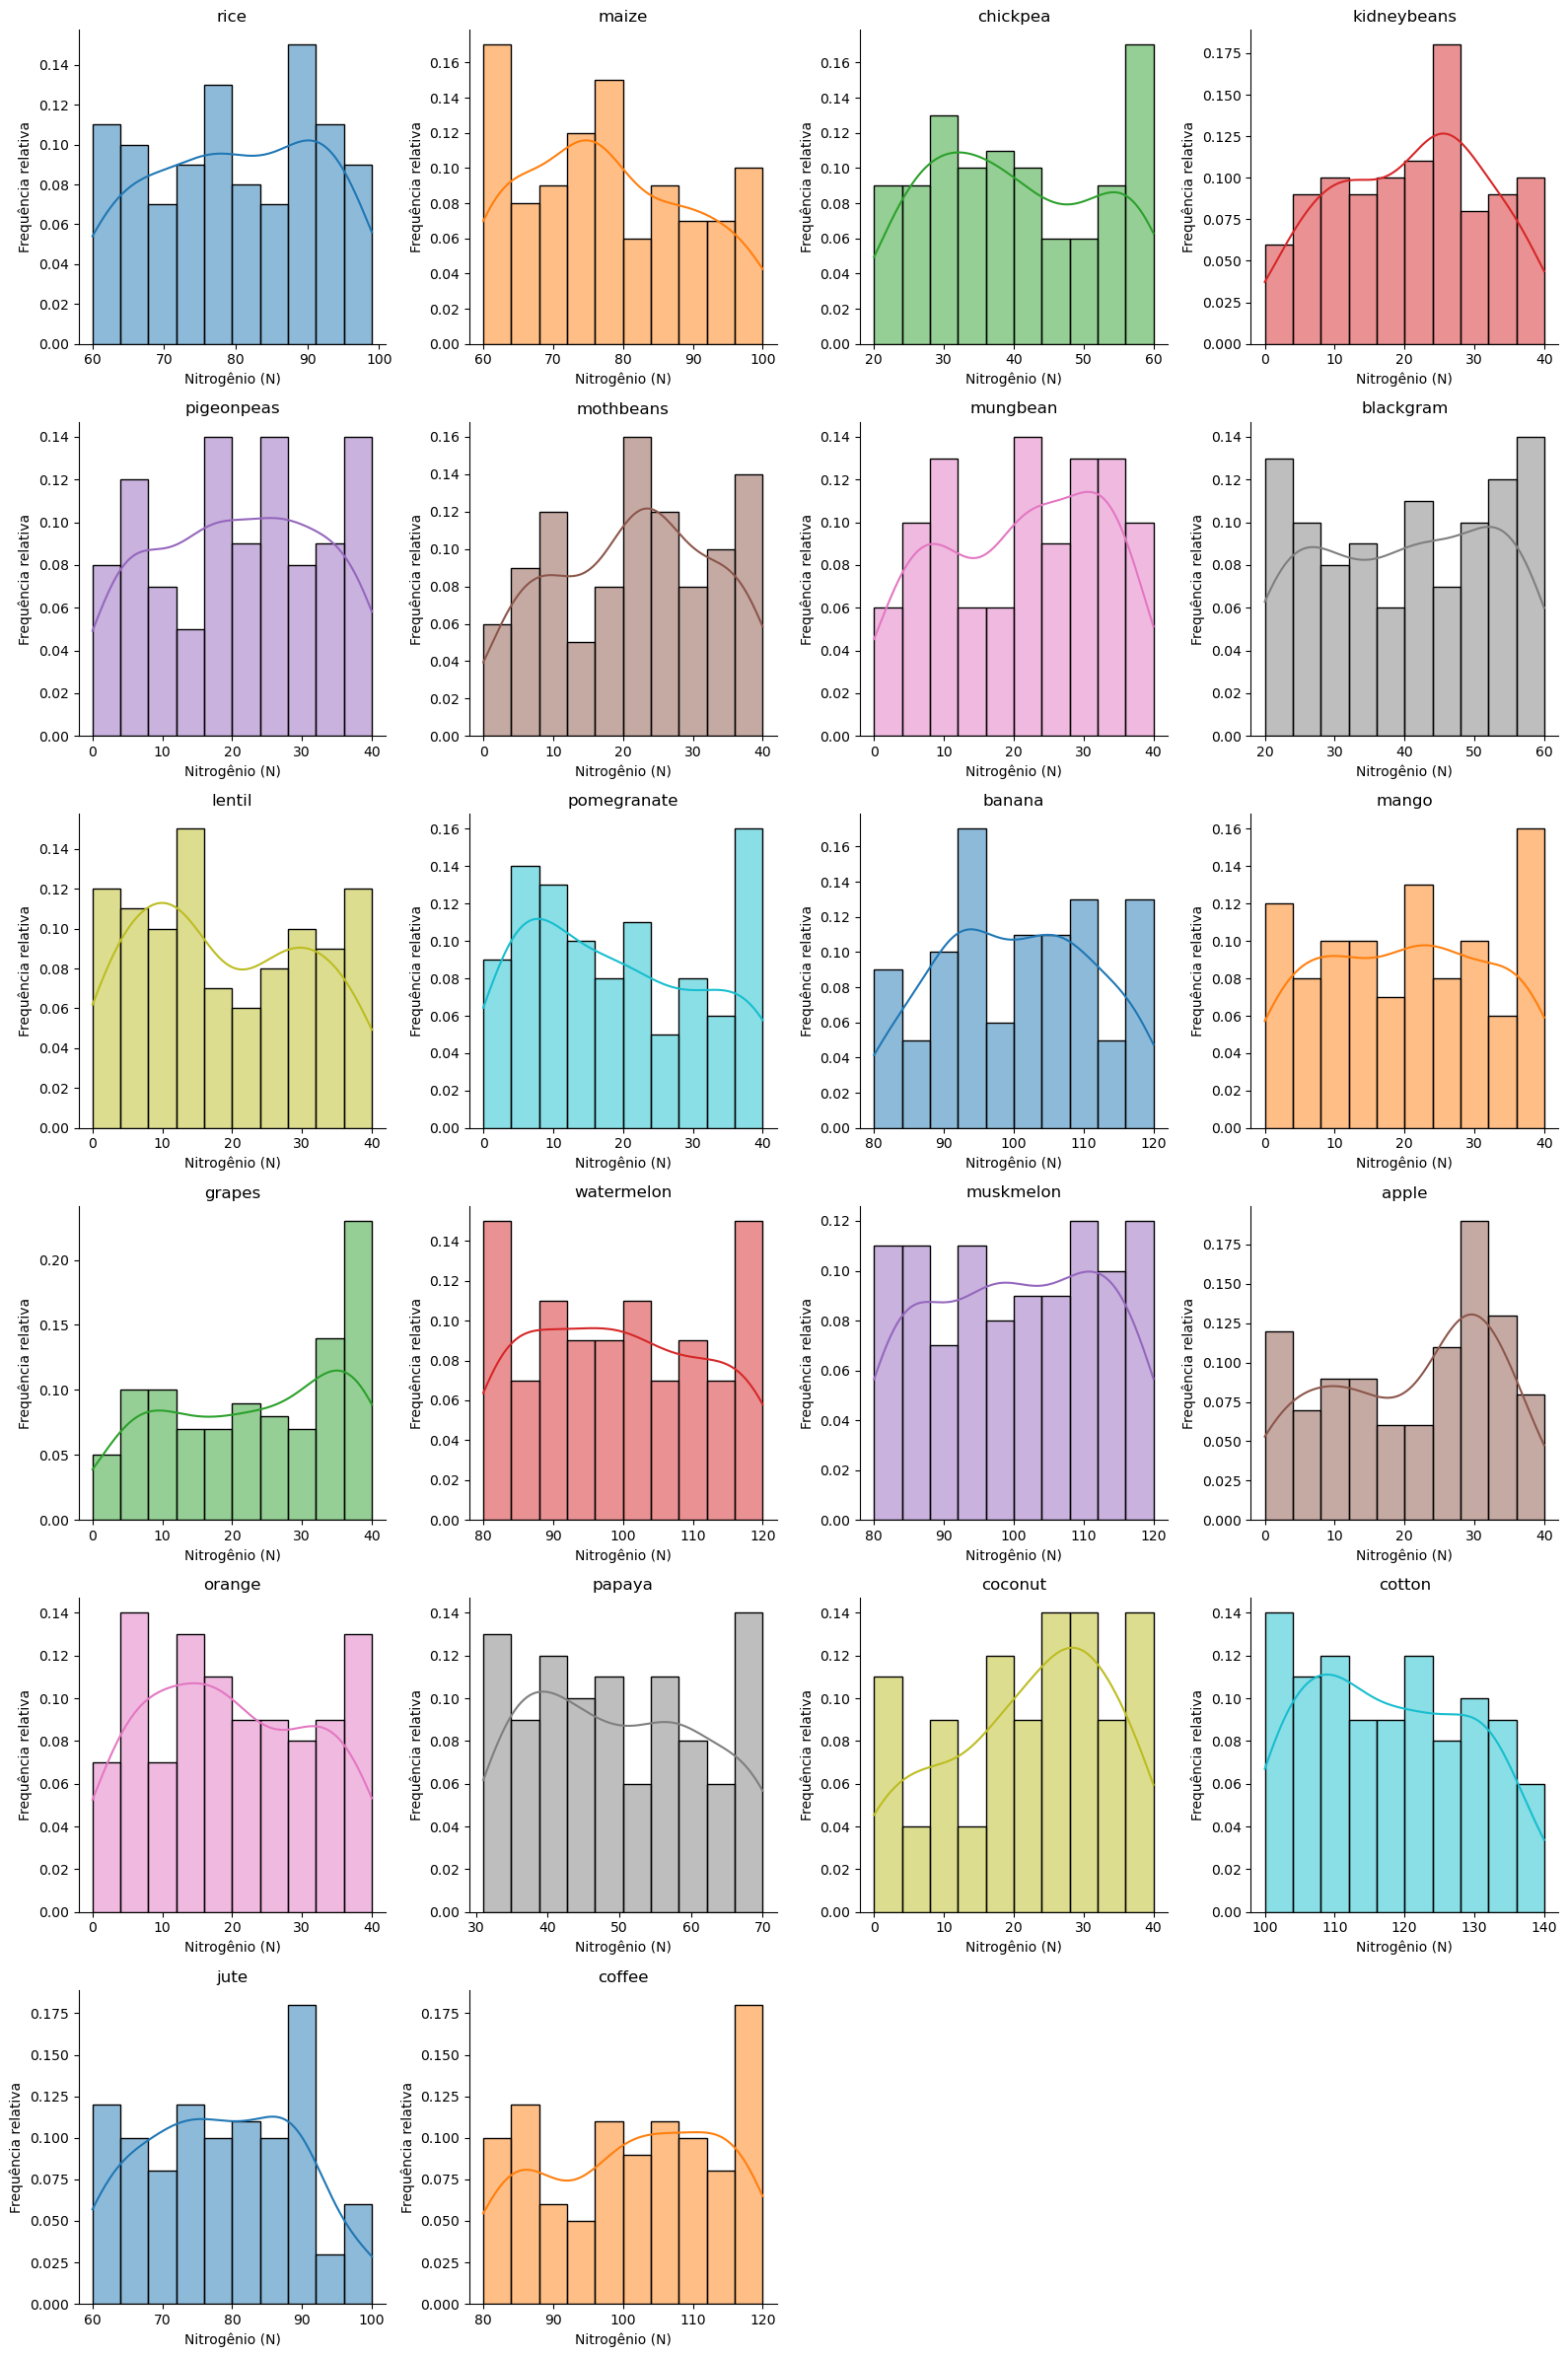

In [ ]:
# Paleta personalizada de cores
palette = sns.color_palette("tab10", df["label"].nunique())
labels = df["label"].unique()

# Criar o grid
g = sns.FacetGrid(df, col="label", col_wrap=4, height=4, sharex=False, sharey=False)

# Iterar sobre os eixos e aplicar a cor específica com frequência relativa
for ax, label, color in zip(g.axes.flat, labels, palette):
    subset = df[df["label"] == label]
    sns.histplot(subset["N"], bins=10, kde=True, stat="probability", color=color, ax=ax)
    ax.set_title(label)
    ax.set_xlabel("Nitrogênio (N)")
    ax.set_ylabel("Frequência relativa")

plt.tight_layout()
plt.show()

<a id='322'></a>
#### **3.2.2. Boxplot do Fósforo**

O trecho de código abaixo cria um gráfico boxplot que compara visualmente a distribuição de Fósforo (F) no solo para diferentes culturas. O gráfico ajuda a identificar:

- **Mediana**: a linha dentro da caixa indica o valor central de fósforo para cada cultura.
- **Variação**: o tamanho da caixa mostra a dispersão dos dados (intervalo interquartil).
- **Outliers**: os pontos fora das "bigodes" do boxplot indicam valores atípicos.
- **Diferenças entre culturas**: permite comparar a distribuição de fósforo entre diferentes culturas. 


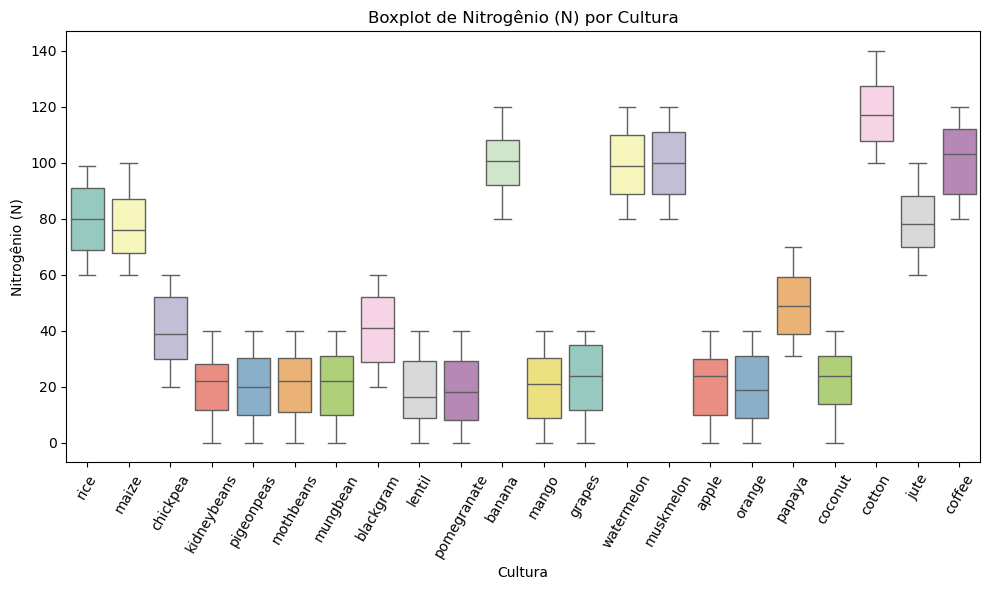

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="label", y="N", palette="Set3")
plt.title("Boxplot de Nitrogênio (N) por Cultura")
plt.xlabel("Cultura")
plt.ylabel("Nitrogênio (N)")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<a id='323'></a>
#### **3.2.3. Histograma do Potássio**

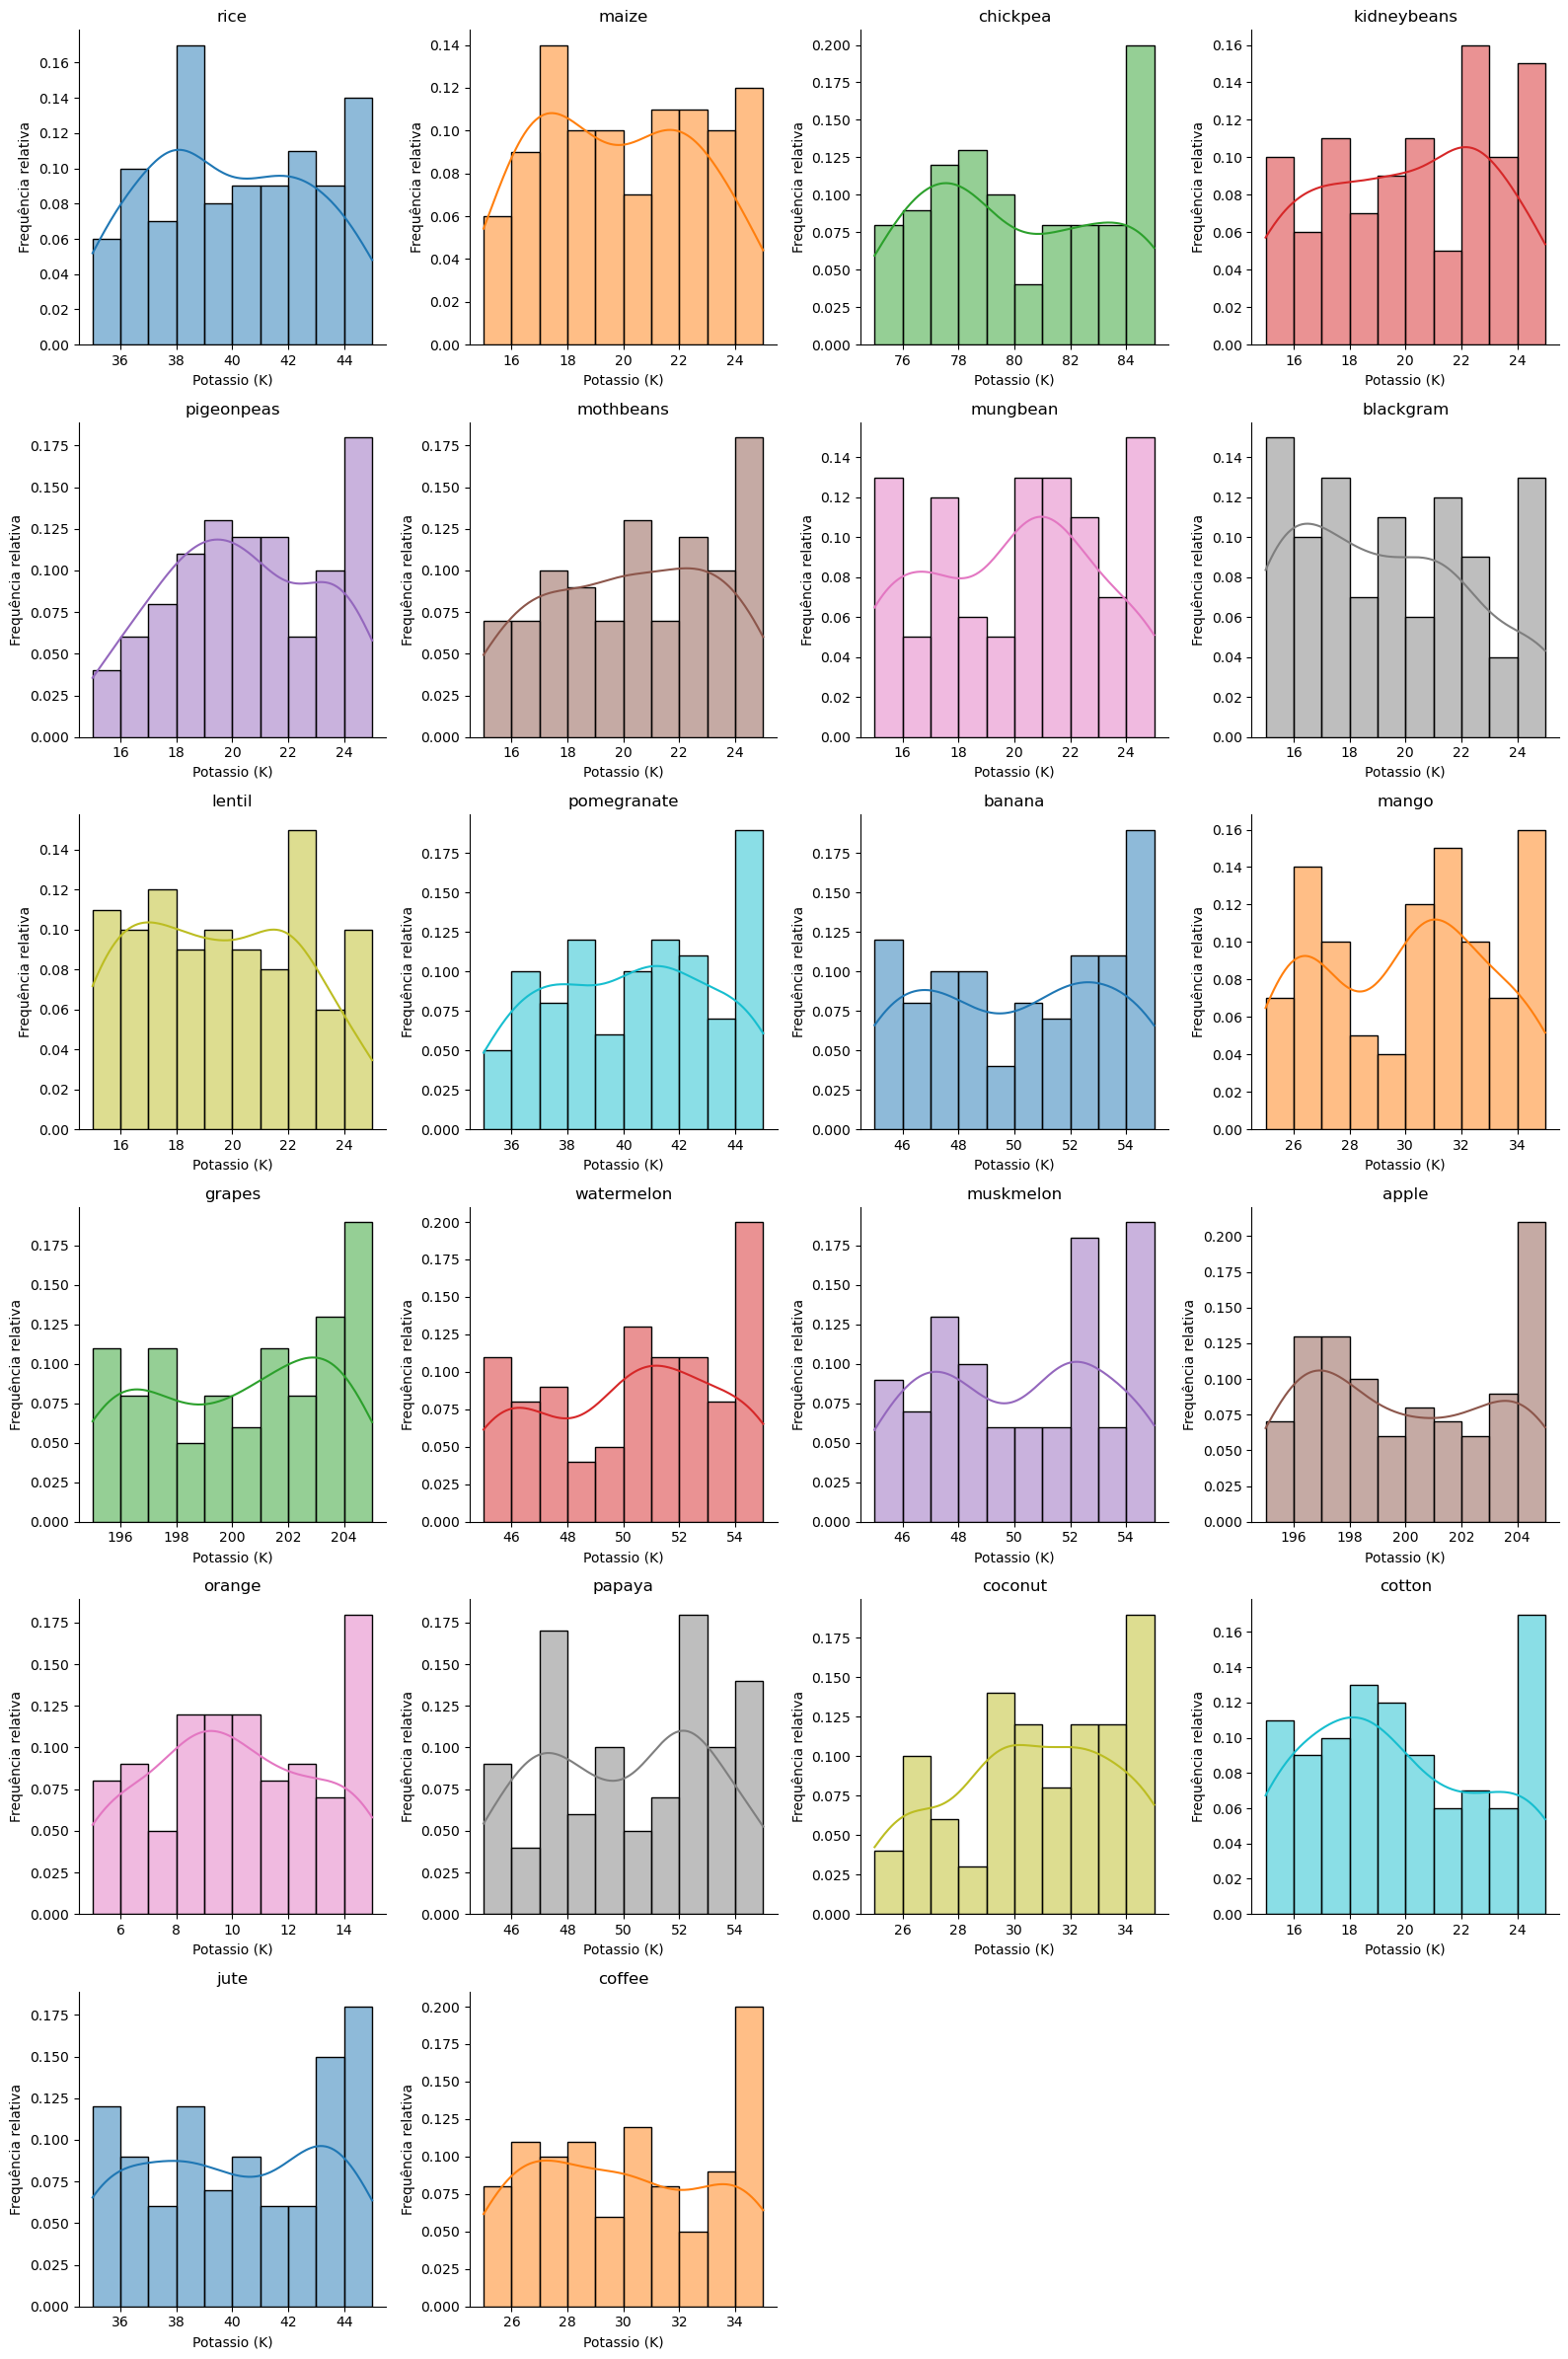

In [ ]:
# Paleta personalizada de cores
palette = sns.color_palette("tab10", df["label"].nunique())
labels = df["label"].unique()

# Criar o grid
g = sns.FacetGrid(df, col="label", col_wrap=4, height=4, sharex=False, sharey=False)

# Iterar sobre os eixos e aplicar a cor específica com frequência relativa
for ax, label, color in zip(g.axes.flat, labels, palette):
    subset = df[df["label"] == label]
    sns.histplot(subset["K"], bins=10, kde=True, stat="probability", color=color, ax=ax)
    ax.set_title(label)
    ax.set_xlabel("Potassio (K)")
    ax.set_ylabel("Frequência relativa")

plt.tight_layout()

<a id='324'></a>
#### **3.2.4. Boxplot do Potássio**

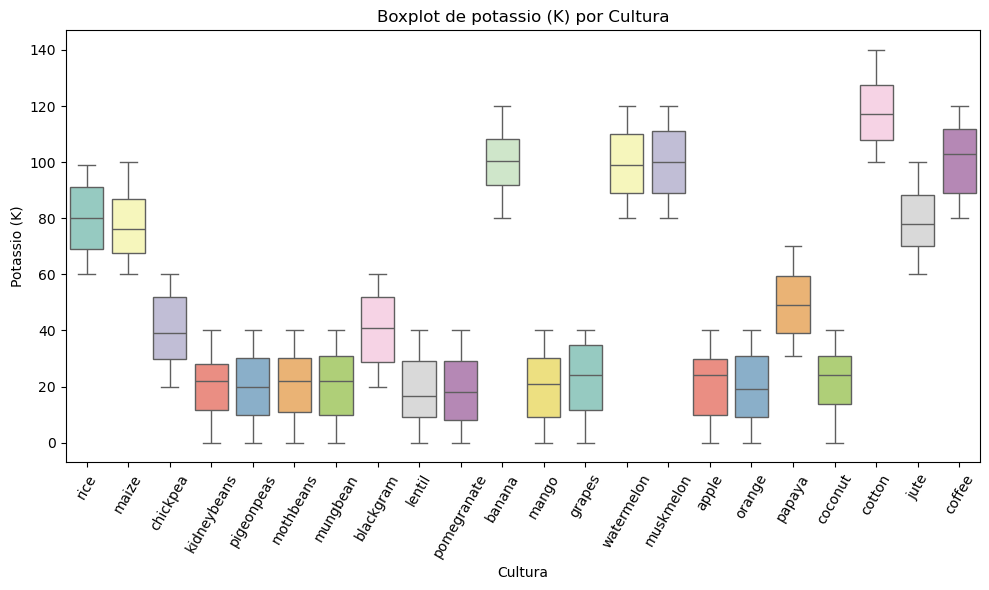

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="label", y="N", palette="Set3")
plt.title("Boxplot de potassio (K) por Cultura")
plt.xlabel("Cultura")
plt.ylabel("Potassio (K)")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<a id='325'></a>
#### **3.2.5. Histograma do Fósforo**

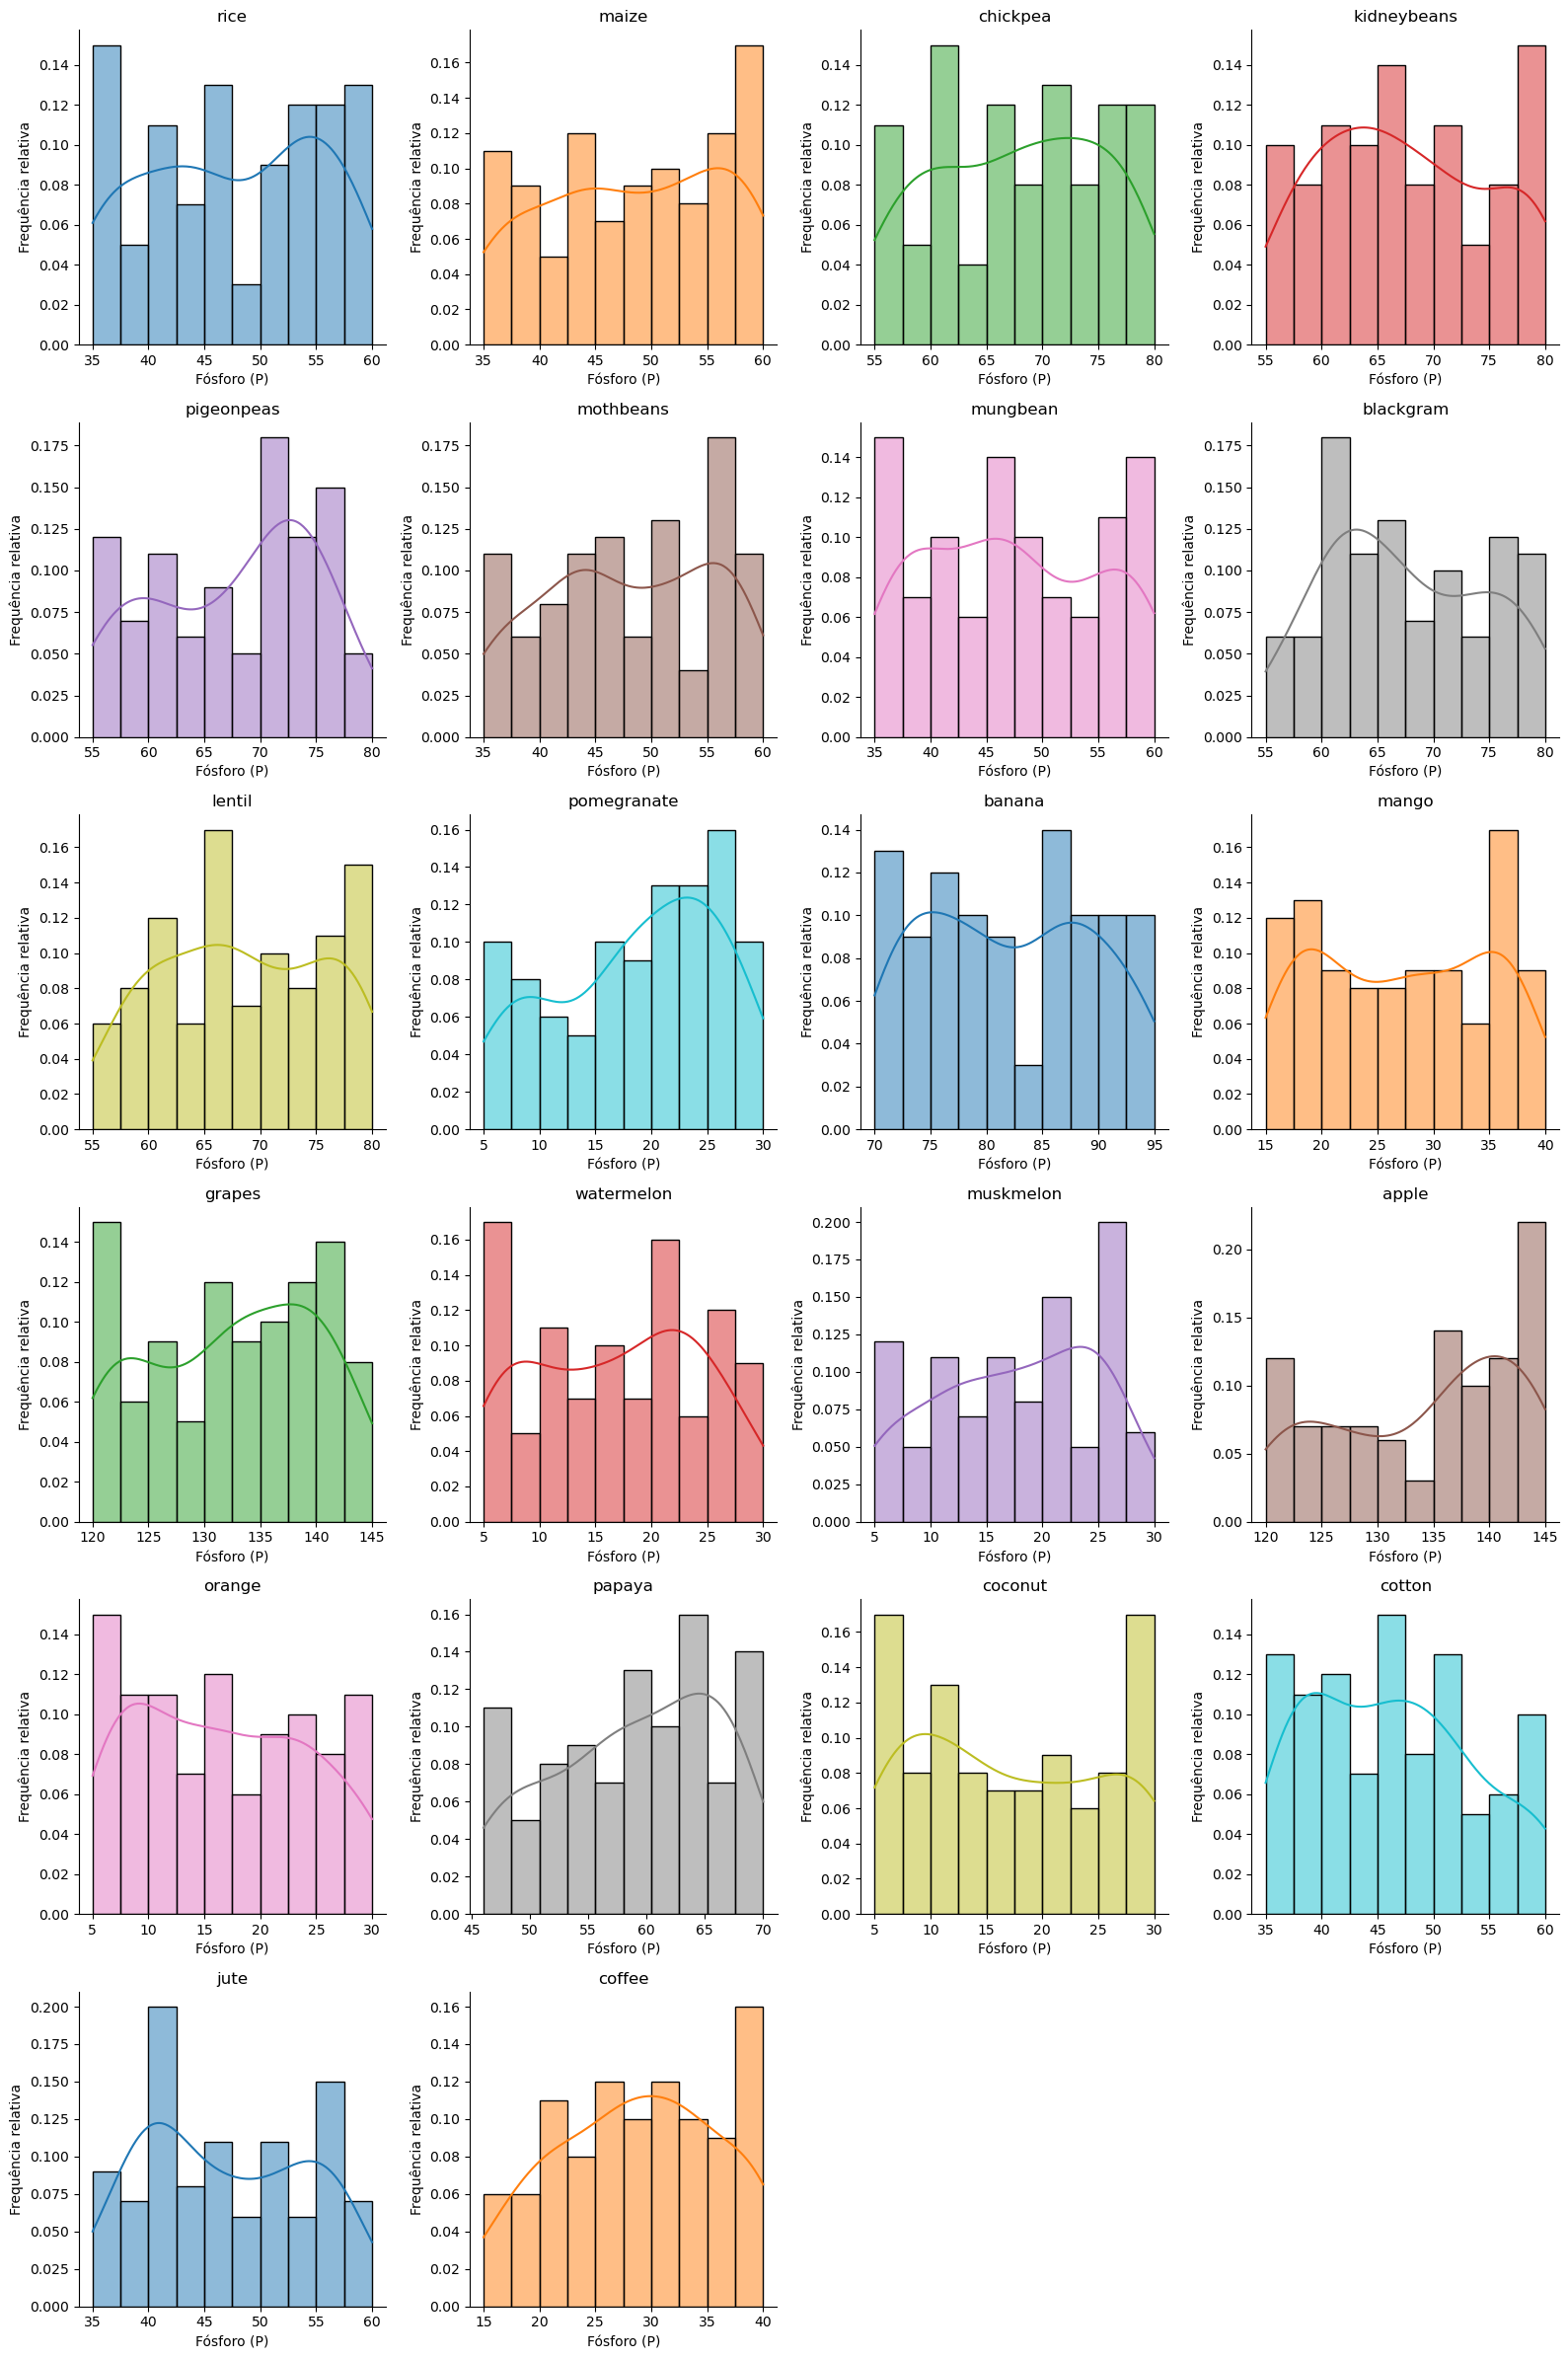

In [ ]:
# Paleta personalizada de cores
palette = sns.color_palette("tab10", df["label"].nunique())
labels = df["label"].unique()

# Criar o grid
g = sns.FacetGrid(df, col="label", col_wrap=4, height=4, sharex=False, sharey=False)

# Iterar sobre os eixos e aplicar a cor específica com frequência relativa
for ax, label, color in zip(g.axes.flat, labels, palette):
    subset = df[df["label"] == label]
    sns.histplot(subset["P"], bins=10, kde=True, stat="probability", color=color, ax=ax)
    ax.set_title(label)
    ax.set_xlabel("Fósforo (P)")
    ax.set_ylabel("Frequência relativa")

plt.tight_layout()

<a id='326'></a>
#### **3.2.6. Boxplot do Fósforo**

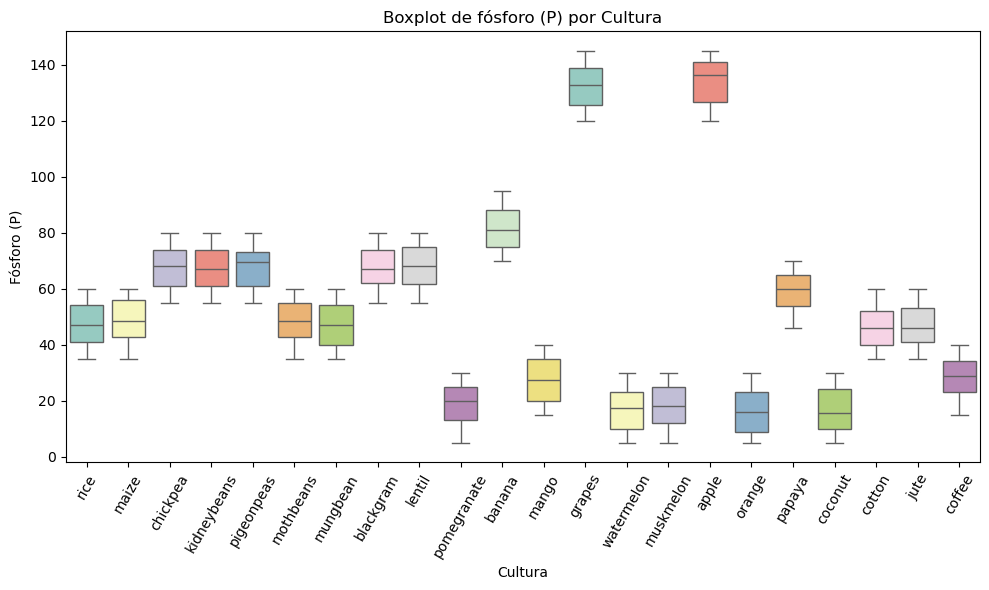

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="label", y="P", palette="Set3")
plt.title("Boxplot de fósforo (P) por Cultura")
plt.xlabel("Cultura")
plt.ylabel("Fósforo (P)")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<a id='327'></a>
#### **3.2.7 Matriz Correlação Linear**

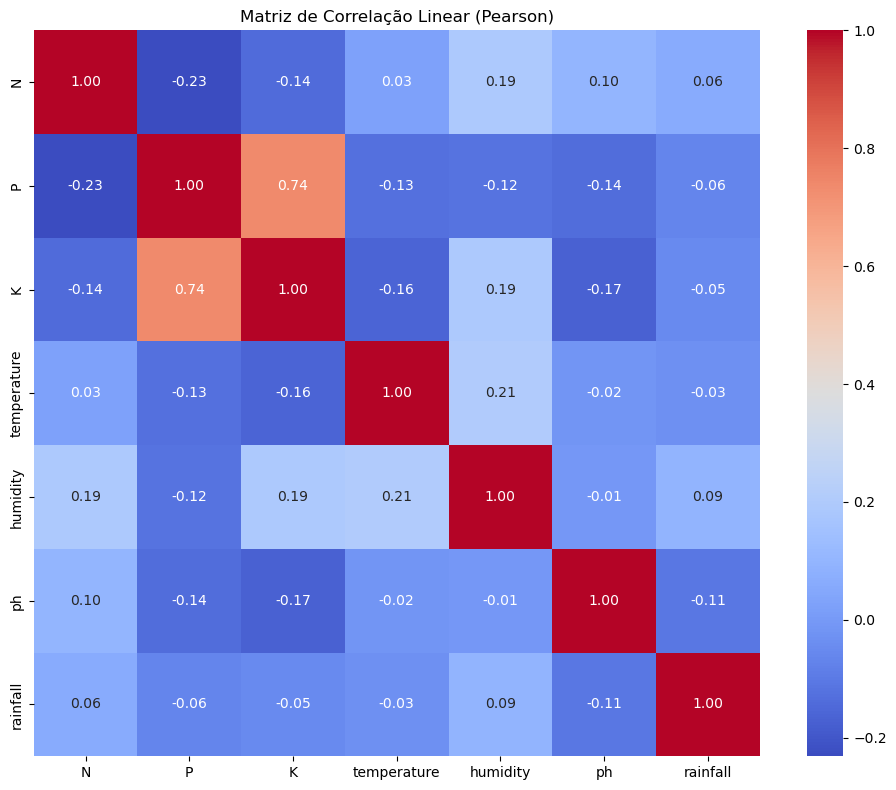

In [ ]:
# Remove a coluna categórica para correlação
df_numerico = df.drop(columns=['label'])

# Calcula a matriz de correlação
correlacao = df_numerico.corr()

# Exibe a matriz como um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlação Linear (Pearson)")
plt.tight_layout()
plt.show()

<a id='328'></a>
#### **3.2.8 - Gráfico Linear**

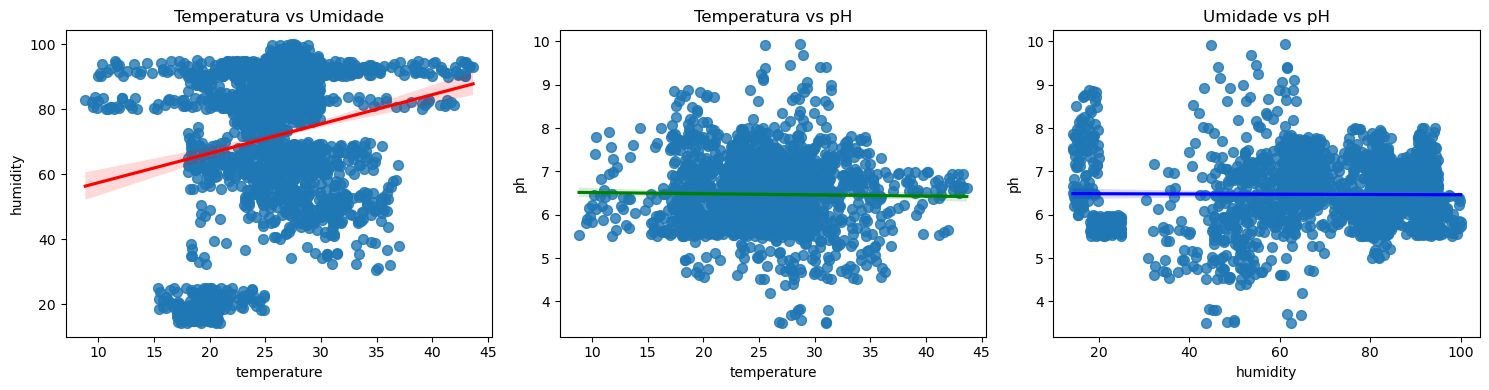

In [ ]:
# Cria os scatterplots com linha de tendência
plt.figure(figsize=(15, 4))

# temperature vs humidity
plt.subplot(1, 3, 1)
sns.regplot(data=df, x="temperature", y="humidity", scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Temperatura vs Umidade")

# temperature vs ph
plt.subplot(1, 3, 2)
sns.regplot(data=df, x="temperature", y="ph", scatter_kws={"s": 50}, line_kws={"color": "green"})
plt.title("Temperatura vs pH")

# humidity vs ph
plt.subplot(1, 3, 3)
sns.regplot(data=df, x="humidity", y="ph", scatter_kws={"s": 50}, line_kws={"color": "blue"})
plt.title("Umidade vs pH")

plt.tight_layout()
plt.show()


<a id='329'></a>
#### **3.2.9. Boxplot da Precipitação de Chuva**

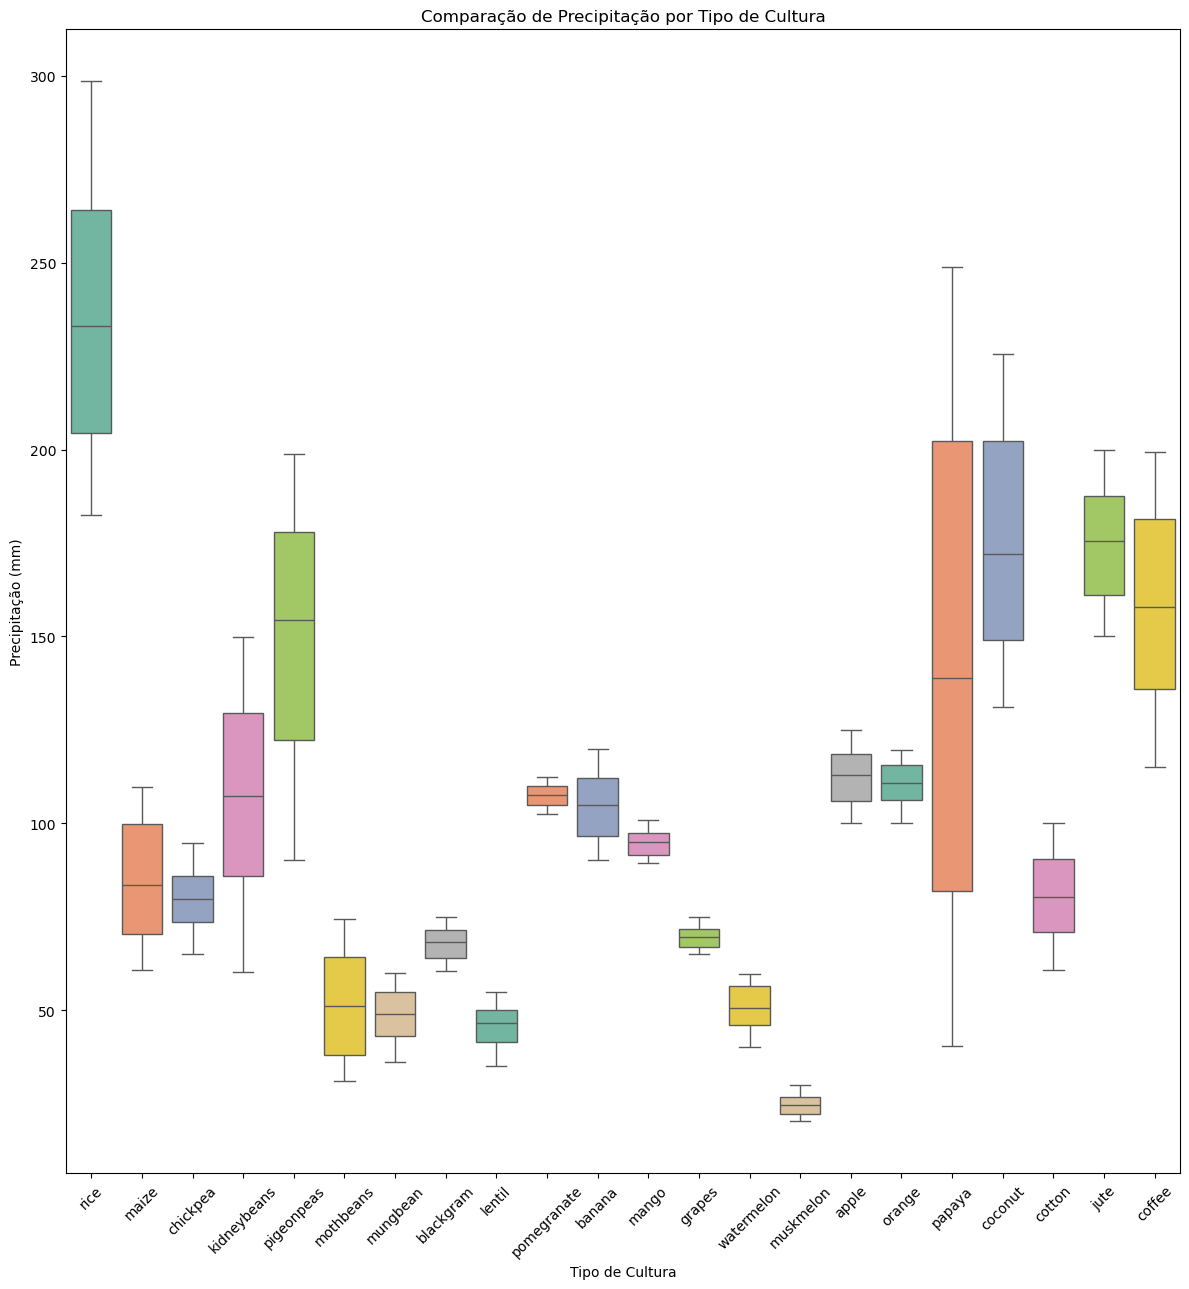

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Desabilita mensagens de progresso
import warnings
warnings.filterwarnings("ignore")

# Suponha que seu DataFrame completo esteja carregado como df
# df = pd.read_csv('seuarquivo.csv')  # ou já está definido

plt.figure(figsize=(12, 13))
sns.boxplot(data=df, x='label', y='rainfall', palette='Set2', dodge=False)
plt.title('Comparação de Precipitação por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Precipitação (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='33'></a>
### **3.3. Análise de Perfil Ideal**

Tem como objetivo comparar os valores médios das variáveis do solo para algumas culturas agrícolas (arroz, lentilha, milho) com um perfil ideal médio, a fim de identificar como cada cultura se desvia desse ideal.

**As etapas de execução são:**

- Define as variáveis do solo que serão analisadas (como Nitrogênio, Fósforo, Potássio, etc).

- Calcula o "perfil ideal" para essas variáveis, com base na média, mediana e moda de todas as amostras disponíveis.

- Seleciona três culturas específicas para comparação: arroz (rice), lentilha (lentil) e milho (maize).

- Calcula a média dos valores do solo para cada cultura, ou seja, o que cada cultura costuma "preferir" em termos de nutrientes e clima.

- Gera um gráfico comparando os valores médios das culturas com o perfil ideal, para visualização.

- Compara os dados de cada cultura com o perfil ideal, destacando se ela prefere valores mais altos, mais baixos ou iguais para cada variável.

In [ ]:
# Agrupa as colunas numéricas
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calcular média, mediana e moda para cada coluna
perfil_ideal = {
    'Média': df[numerical_cols].mean(),
    'Mediana': df[numerical_cols].median(),
    'Moda': df[numerical_cols].mode().iloc[0]
}

# Converter para DataFrame para visualização mais clara
perfil_ideal_df = pd.DataFrame(perfil_ideal)
perfil_ideal_df = perfil_ideal_df.round(2)
perfil_ideal_df

,Média,Mediana,Moda
N,50.55,37.00,22.00
P,53.36,51.00,60.00
K,48.15,32.00,17.00
temperature,25.62,25.60,8.83
humidity,71.48,80.47,14.26
ph,6.47,6.43,3.50
rainfall,103.46,94.87,20.21


##### **Interpretação e Análise**

##### **Macronutrientes (N, P, K):**

* **Nitrogênio (N):**

  * Média: 50.55, Mediana: 37.00 — indica uma assimetria positiva (valores altos puxam a média para cima).
  * Moda: 22.00 — muito abaixo da média, sugerindo uma alta frequência de solos pobres em N.
* **Fósforo (P):**

  * Média e mediana próximas (53.36 e 51.00) — distribuição mais equilibrada.
  * Moda: 60.00 — comum em solos com adubação média a alta.
* **Potássio (K):**

  * Semelhante ao N: média bem acima da mediana (48.15 vs 32.00), com moda ainda mais baixa (17.00), indicando uma concentração de valores baixos e alguns extremos mais altos.

##### **2. Temperatura:**

* Média (25.62 °C) e mediana (25.60 °C) muito próximas — distribuição normal.
* Moda extremamente baixa (8.83 °C), o que **pode indicar erro**, outlier extremo, ou um registro isolado de clima frio.

##### **3. Umidade:**

* Mediana (80.47%) bem acima da média (71.48%), com moda ainda mais baixa (14.26%) — distribuição **assimétrica negativa**, sugerindo variação grande e possível concentração em ambientes muito úmidos.

##### **4. pH do solo:**

* Média e mediana em torno de 6.4 — faixa levemente ácida, adequada para a maioria das culturas.
* Moda 3.50 — valor bem ácido e incomum, provavelmente um outlier ou ponto raro.

##### **5. Chuva:**

* Média de 103.46 mm e mediana de 94.87 mm indicam boa pluviosidade.
* Moda de 20.21 mm — muito inferior, o que pode indicar que muitos solos estão em áreas de baixa chuva e há forte variação entre regiões.


#####  **Considerações Finais**

* Os dados sugerem grande **variabilidade nas condições de cultivo**, com alguns valores indicando presença de **outliers ou dados desbalanceados**.
* Isso pode impactar modelos de recomendação de culturas, tornando importante o uso de técnicas de normalização ou remoção de valores extremos.
* O solo, em média, apresenta **fertilidade moderada** e **condições climáticas favoráveis** (temperatura e umidade razoáveis), mas com **pontos de escassez hídrica, acidez e baixos teores de nutrientes** em vários registros.

Se quiser, posso montar gráficos (boxplots, histogramas) ou fazer uma análise de normalidade/distribuição dos dados. Deseja isso?



============================ PERFIL IDEAL =============================
                  Média    Mediana       Moda
N             50.551818  37.000000  22.000000
P             53.362727  51.000000  60.000000
K             48.149091  32.000000  17.000000
temperature   25.616244  25.598693   8.825675
humidity      71.481779  80.473146  14.258040
ph             6.469480   6.425045   3.504752
rainfall     103.463655  94.867624  20.211267

============================ MÉDIAS POR CULTURA SELECIONADA =============================
label           lentil      maize        rice
N            18.770000  77.760000   79.890000
P            68.360000  48.440000   47.580000
K            19.410000  19.790000   39.870000
temperature  24.509052  22.389204   23.689332
humidity     64.804785  65.092249   82.272822
ph            6.927932   6.245190    6.425471
rainfall     45.680454  84.766988  236.181114


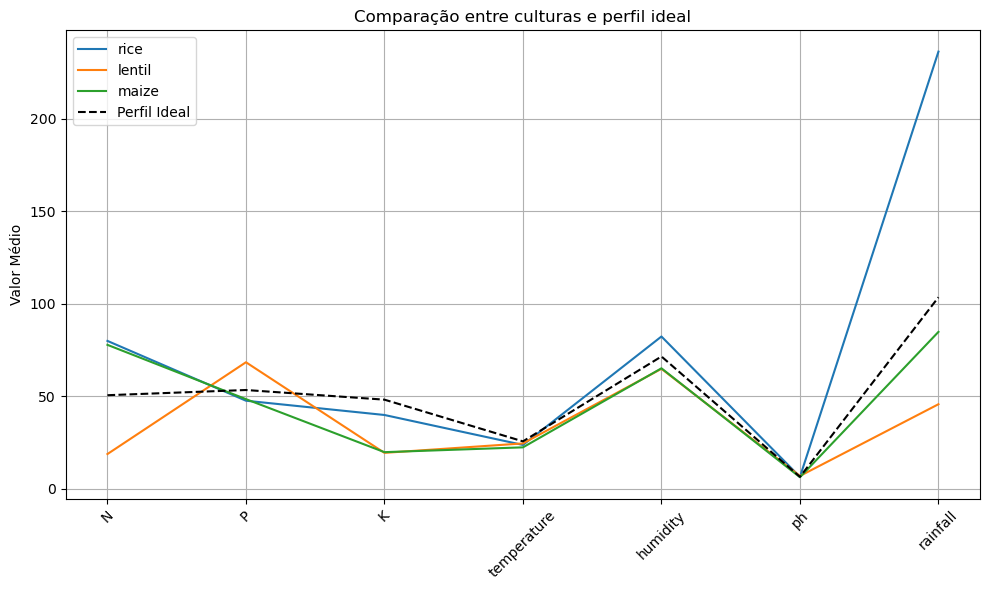


============================ RICE ============================
N: prefere valores MAIS ALTOS que o ideal (ideal=50.55, rice=79.89)
P: prefere valores MAIS BAIXOS que o ideal (ideal=53.36, rice=47.58)
K: prefere valores MAIS BAIXOS que o ideal (ideal=48.15, rice=39.87)
temperature: prefere valores MAIS BAIXOS que o ideal (ideal=25.62, rice=23.69)
humidity: prefere valores MAIS ALTOS que o ideal (ideal=71.48, rice=82.27)
ph: prefere valores MAIS BAIXOS que o ideal (ideal=6.47, rice=6.43)
rainfall: prefere valores MAIS ALTOS que o ideal (ideal=103.46, rice=236.18)

============================ LENTIL ============================
N: prefere valores MAIS BAIXOS que o ideal (ideal=50.55, lentil=18.77)
P: prefere valores MAIS ALTOS que o ideal (ideal=53.36, lentil=68.36)
K: prefere valores MAIS BAIXOS que o ideal (ideal=48.15, lentil=19.41)
temperature: prefere valores MAIS BAIXOS que o ideal (ideal=25.62, lentil=24.51)
humidity: prefere valores MAIS BAIXOS que o ideal (ideal=71.48, lentil=6

In [ ]:
# Definir colunas de interesse
variaveis = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calcular o perfil ideal
perfil_ideal = {
    'Média': df[variaveis].mean(),
    'Mediana': df[variaveis].median(),
    'Moda': df[variaveis].mode().iloc[0]  # primeira moda
}

perfil_ideal_df = pd.DataFrame(perfil_ideal)
print("\n============================ PERFIL IDEAL =============================")
print(perfil_ideal_df)

# Selecionar culturas para análise
culturas = ['rice', 'lentil', 'maize']
dados_culturas = df[df['label'].isin(culturas)]

# Calcular estatísticas por cultura
stats_por_cultura = dados_culturas.groupby('label')[variaveis].mean().T
print("\n============================ MÉDIAS POR CULTURA SELECIONADA =============================")
print(stats_por_cultura)

# Comparação com perfil ideal (gráficos) 
plt.figure(figsize=(10, 6))
for cultura in culturas:
    plt.plot(stats_por_cultura.index, stats_por_cultura[cultura], label=cultura)

plt.plot(stats_por_cultura.index, perfil_ideal_df['Média'], label='Perfil Ideal', linestyle='--', color='black')
plt.title('Comparação entre culturas e perfil ideal')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Preferências por cultura (texto)
def comparar_com_ideal(nome, dados):
    print(f"\n============================ {nome.upper()} ============================")
    for var in variaveis:
        media_cult = dados[var]
        media_ideal = perfil_ideal_df.loc[var, 'Média']
        if media_cult > media_ideal:
            print(f"{var}: prefere valores MAIS ALTOS que o ideal (ideal={media_ideal:.2f}, {nome}={media_cult:.2f})")
        elif media_cult < media_ideal:
            print(f"{var}: prefere valores MAIS BAIXOS que o ideal (ideal={media_ideal:.2f}, {nome}={media_cult:.2f})")
        else:
            print(f"{var}: igual ao ideal")

for cultura in culturas:
    comparar_com_ideal(cultura, stats_por_cultura[cultura])

<a id='331'></a>
#### **3.3.1. Relatório de resultados da análise de perfil ideal**

**Diferenças marcantes entre culturas e o perfil ideal**

- **Rice (arroz) apresenta um perfil bem distinto:**

    Nitrogênio (N) e umidade estão acima do ideal, com a chuva (rainfall) muito maior que a média ideal. Isso sugere que o arroz se desenvolve bem em ambientes muito úmidos e alagados, o que está de acordo com o que se conhece dessa cultura.

    Já o potássio (K), fósforo (P) e temperatura estão abaixo da média ideal, indicando um solo menos exigente nesses aspectos ou com adaptações específicas do arroz.

- **Lentil (lentilha) se destaca por:**

    Exigir muito mais fósforo (P), mas menos nitrogênio e potássio. Isso sugere uma preferência por solos menos nitrogenados, porém com boa disponibilidade de fósforo.

    Temperatura, umidade e chuva abaixo da média ideal reforçam que é uma cultura de clima mais seco e menos tropical.

    pH acima da média também sugere preferência por solos levemente alcalinos.

- **Maize (milho):**

    Também exige muito Nitrogênio, como o arroz, mas com menor umidade e chuva, sinalizando resistência moderada à seca.

    Requer baixos níveis de potássio e um pH um pouco mais ácido, o que é comum em várias regiões brasileiras de produção de milho.

<a id='4'></a>
## **4. Modelagem Preditiva**

<a id='41'></a>
### **4.1. Separação dos Modelos para Treino e Teste**

In [ ]:
# Carregar os dados
df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")

# Separar features e rótulo
X = df.drop("label", axis=1)
y = df["label"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='42'></a>
### **4.2 Regressão Logística**

A regressão logística está sendo usada para classificar a cultura agrícola mais adequada com base em características como N (Nitrogênio), P (Fósforo), K (Potássio), temperatura, umidade, pH e pluviosidade. O modelo aprende a relação entre essas características e as diferentes culturas, e então pode prever qual cultura é mais provável de ser adequada para um novo conjunto de condições.

In [ ]:
# 8. Treinamento do Modelo
model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
model.fit(X_train_scaled, y_train)

# 9. Avaliação do Modelo
y_pred = model.predict(X_test_scaled)

# 10. Avaliar o desempenho do modelo
target_names = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.95      0.90      0.92        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.85      1.00      0.92        17
      cotton       0.94      0.94      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.57      0.72        23
 kidneybeans       0.90      0.95      0.93        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       0.76      1.00      0.86        19
   mothbeans       1.00      0.71      0.83        24
    mungbean       0.86      1.00      0.93        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.94    

<a id='43'></a>
### **4.3. Árvore de Decisão**


<Figure size 1200x600 with 0 Axes>

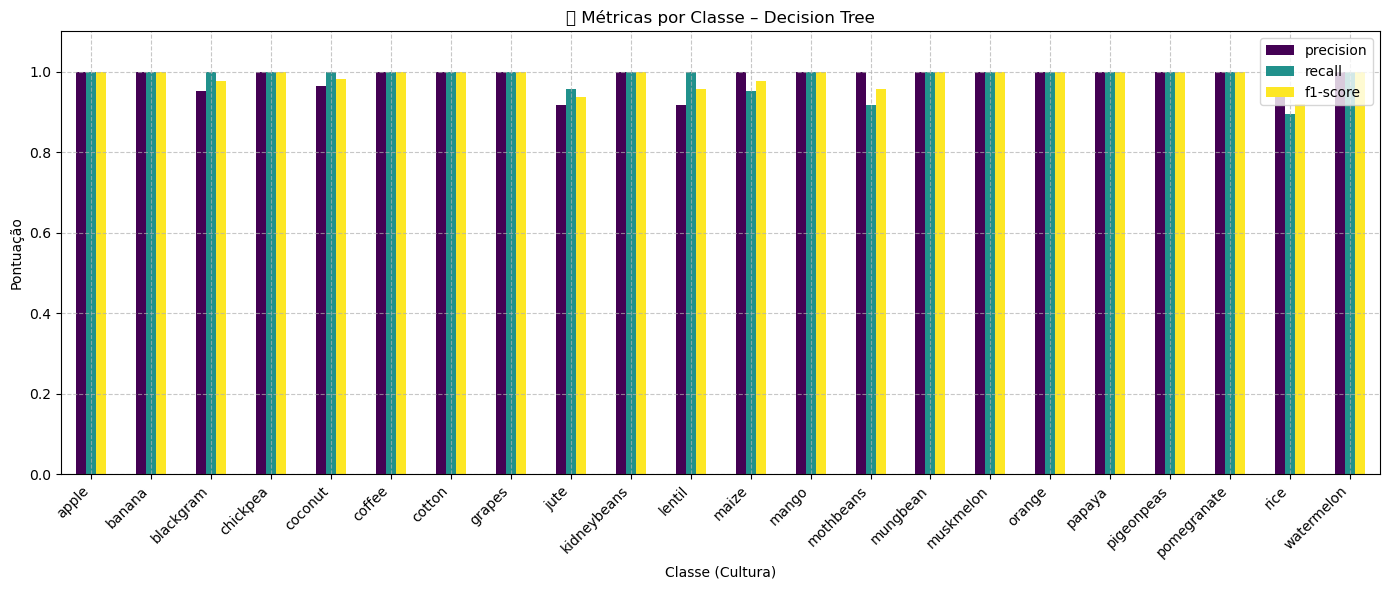

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter o dicionário do relatório em DataFrame (ignorando 'accuracy', 'macro avg' e 'weighted avg' se quiser focar por classe)
df_report = pd.DataFrame(report_dt).transpose()
df_classes = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotando o gráfico
plt.figure(figsize=(12, 6))
df_classes[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('📊 Métricas por Classe – Decision Tree')
plt.xlabel('Classe (Cultura)')
plt.ylabel('Pontuação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<a id='44'></a>
### **4.4. Floresta Aleatória**

<Figure size 1200x600 with 0 Axes>

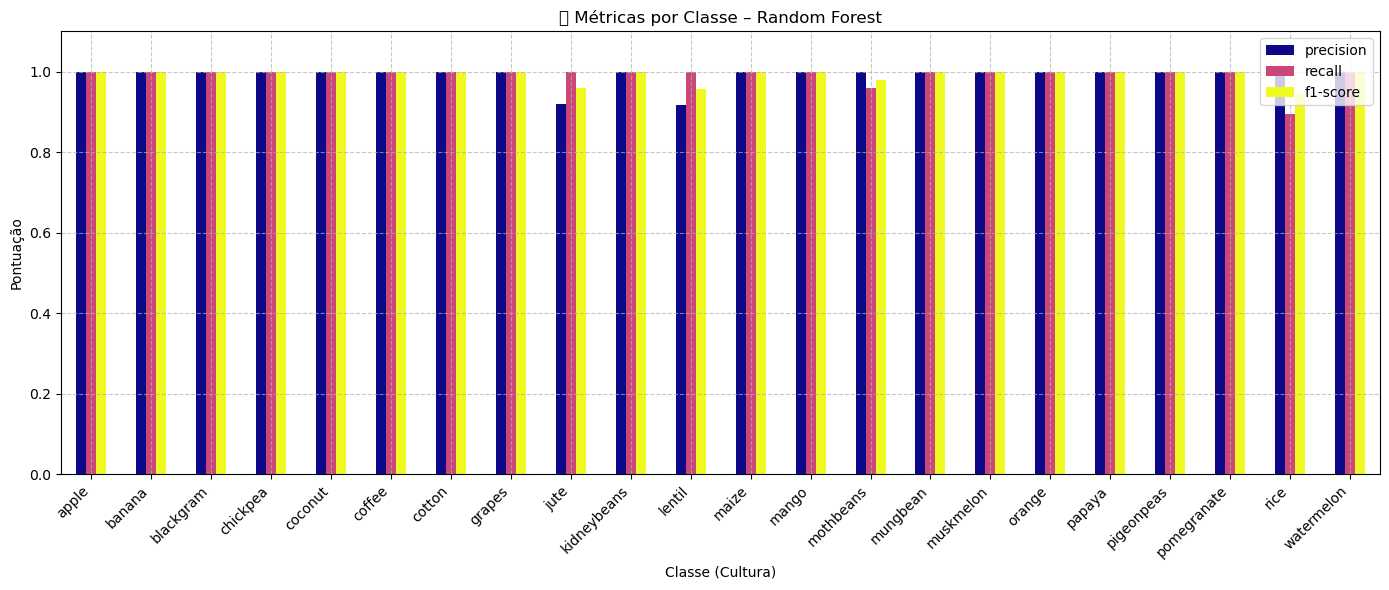

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter o dicionário do relatório em DataFrame e excluir médias e acurácia
df_report_rf = pd.DataFrame(report_rf).transpose()
df_classes_rf = df_report_rf.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotando o gráfico
plt.figure(figsize=(12, 6))
df_classes_rf[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6), colormap='plasma')
plt.title('📊 Métricas por Classe – Random Forest')
plt.xlabel('Classe (Cultura)')
plt.ylabel('Pontuação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<a id='44'></a>
### **4.5. K-Nearest Neighbors (KNN)**

<Figure size 1200x600 with 0 Axes>

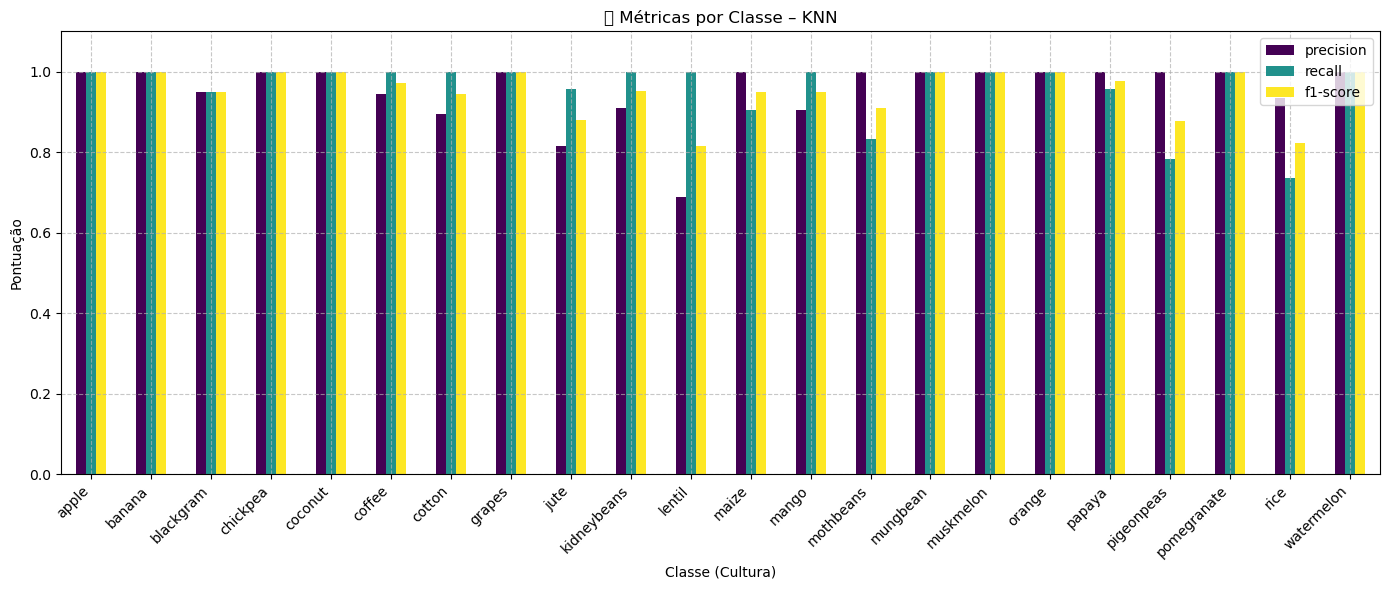

In [ ]:
# Converter o dicionário do relatório em DataFrame e excluir médias e acurácia
df_report_knn = pd.DataFrame(report_knn).transpose()
df_classes_knn = df_report_knn.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotando o gráfico
plt.figure(figsize=(12, 6))
df_classes_knn[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('📊 Métricas por Classe – KNN')
plt.xlabel('Classe (Cultura)')
plt.ylabel('Pontuação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<a id='46'></a>
### **4.6. Regressão Logistica**

<Figure size 1200x600 with 0 Axes>

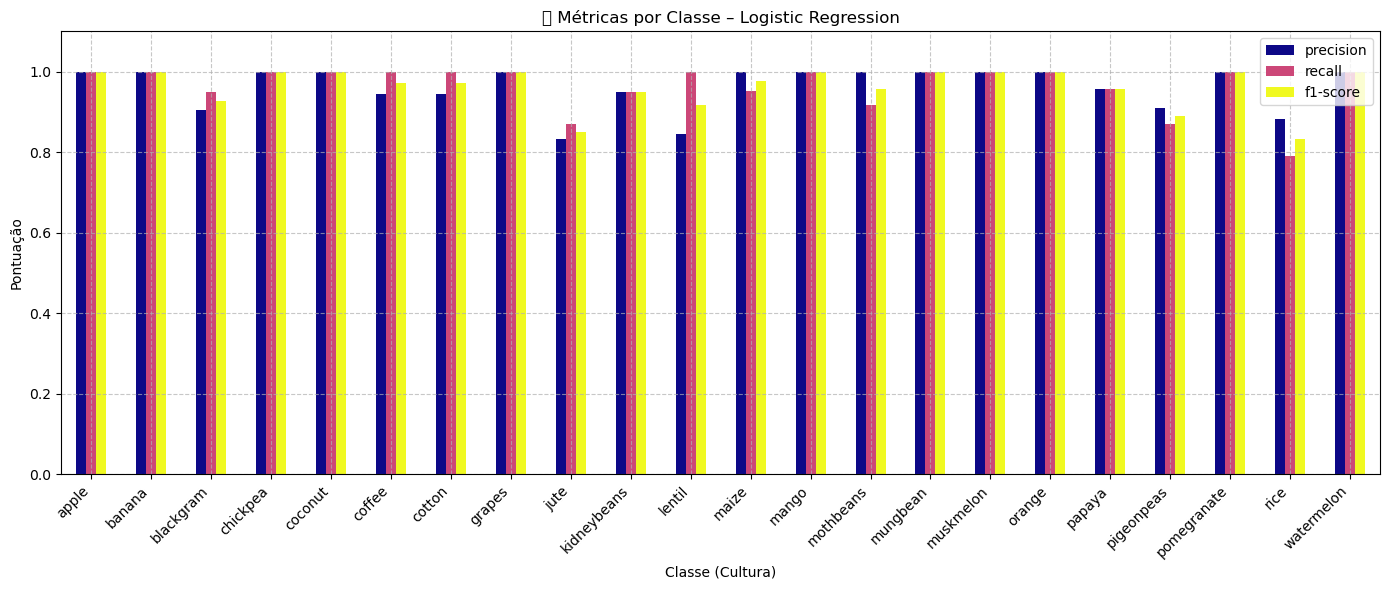

In [ ]:
# Converter o classification report em DataFrame e remover médias
df_report_lr = pd.DataFrame(report_lr).transpose()
df_classes_lr = df_report_lr.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotando o gráfico
plt.figure(figsize=(12, 6))
df_classes_lr[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6), colormap='plasma')
plt.title('📊 Métricas por Classe – Logistic Regression')
plt.xlabel('Classe (Cultura)')
plt.ylabel('Pontuação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<a id='47'></a>
### **4.7.  Máquina de Vetor de Suporte**

In [ ]:
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

### **4.8 Comparando os Modelos**

=========== Avaliação Geral ===========

📊 Modelo: Decision Tree
🎯 Acurácia: 0.99
📌 Precision: 0.99
📌 Recall: 0.99
📌 F1-Score: 0.99
🧩 Matriz de Confusão – Decision Tree:


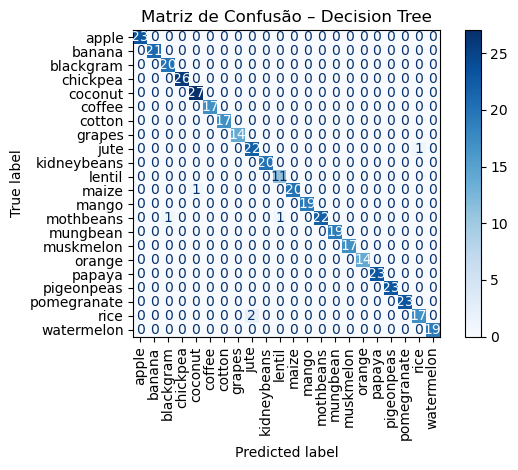


📊 Modelo: Random Forest
🎯 Acurácia: 0.99
📌 Precision: 0.99
📌 Recall: 0.99
📌 F1-Score: 0.99
🧩 Matriz de Confusão – Random Forest:


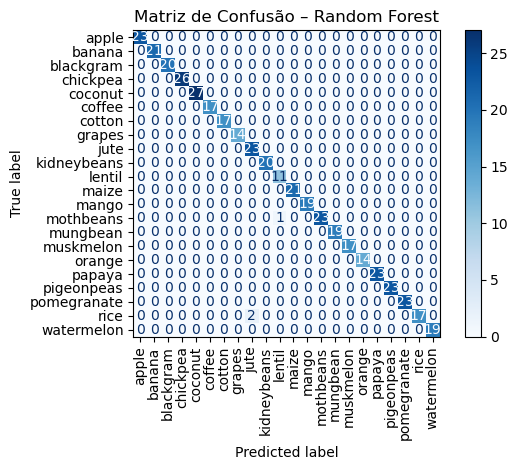


📊 Modelo: KNN
🎯 Acurácia: 0.96
📌 Precision: 0.96
📌 Recall: 0.96
📌 F1-Score: 0.96
🧩 Matriz de Confusão – KNN:


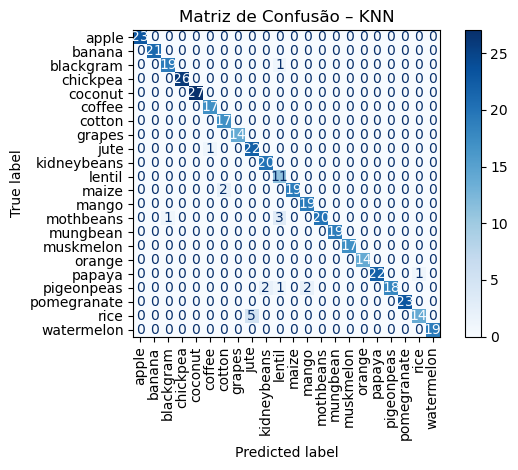


📊 Modelo: Logistic Regression
🎯 Acurácia: 0.96
📌 Precision: 0.96
📌 Recall: 0.96
📌 F1-Score: 0.96
🧩 Matriz de Confusão – Logistic Regression:


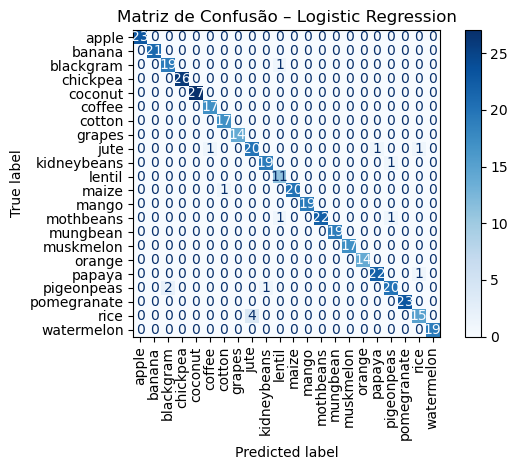


📊 Modelo: SVM
🎯 Acurácia: 0.97
📌 Precision: 0.97
📌 Recall: 0.97
📌 F1-Score: 0.97
🧩 Matriz de Confusão – SVM:


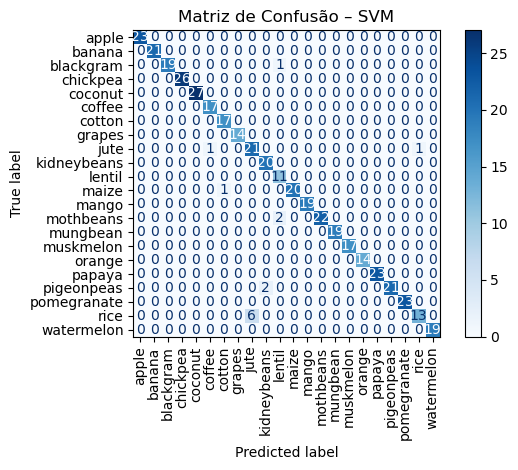


================== Comparativo Final ==================
                Modelo  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.993182   0.993735  0.993182  0.993175
1        Decision Tree  0.986364   0.986806  0.986364  0.986315
2                  SVM  0.968182   0.971517  0.968182  0.968027
3  Logistic Regression  0.963636   0.964442  0.963636  0.963512
4                  KNN  0.956818   0.962898  0.956818  0.956749

🏆 O melhor modelo com base no F1-Score é: Random Forest


In [ ]:
# Dicionário com os modelos treinados e suas previsões
models = {
    "Decision Tree": (model_dt, y_pred_dt),
    "Random Forest": (model_rf, y_pred_rf),
    "KNN": (model_knn, y_pred_knn),
    "Logistic Regression": (model_lr, y_pred_lr),
    "SVM": (model_svm, y_pred_svm)
}

resultados = []

print("=========== Avaliação Geral ===========")
for name, (model, preds) in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    resultados.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": recall,
        "F1-Score": f1
    })

    print(f"\n📊 Modelo: {name}")
    print(f"🎯 Acurácia: {acc:.2f}")
    print(f"📌 Precision: {prec:.2f}")
    print(f"📌 Recall: {recall:.2f}")
    print(f"📌 F1-Score: {f1:.2f}")

    print(f"🧩 Matriz de Confusão – {name}:")
    disp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, preds),
        display_labels=model.classes_
    )
    disp.plot(cmap="Blues", xticks_rotation='vertical')
    plt.title(f"Matriz de Confusão – {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Criar DataFrame com resultados e escolher o melhor modelo
df_resultados = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)
melhor_modelo_nome = df_resultados.iloc[0]["Modelo"]
melhor_modelo = dict(models)[melhor_modelo_nome][0]

print("\n================== Comparativo Final ==================")
print(df_resultados.reset_index(drop=True))
print(f"\n🏆 O melhor modelo com base no F1-Score é: {melhor_modelo_nome}")


## **5. Conclusão**

In [ ]:
# Dicionário para traduzir rótulos para português
tradutor_culturas = {
    "apple": "Maçã",
    "banana": "Banana",
    "blackgram": "Feijão Preto",
    "chickpea": "Grão-de-bico",
    "coconut": "Coco",
    "coffee": "Café",
    "cotton": "Algodão",
    "grapes": "Uvas",
    "jute": "Juta",
    "kidneybeans": "Feijão Vermelho",
    "lentil": "Lentilha",
    "maize": "Milho",
    "mango": "Manga",
    "mothbeans": "Feijão Mariposa",
    "mungbean": "Feijão Mungo",
    "muskmelon": "Melão",
    "orange": "Laranja",
    "papaya": "Mamão",
    "pigeonpeas": "Feijão-guandu",
    "pomegranate": "Romã",
    "rice": "Arroz",
    "watermelon": "Melancia"
}

# Dados de entrada manual
entrada = {
    "N": 30,
    "P": 30,
    "K": 30,
    "temperature": 30.0,
    "humidity": 30.0,
    "ph": 7.0,
    "rainfall": 60.0
}

# Transformar entrada em DataFrame e normalizar
entrada_df = pd.DataFrame([entrada])
entrada_scaled = scaler.transform(entrada_df)

# Fazer predição com o melhor modelo
predicao = melhor_modelo.predict(entrada_scaled)

# Traduzir o resultado
rotulo_ingles = predicao[0]
rotulo_portugues = tradutor_culturas.get(rotulo_ingles, rotulo_ingles)

# Exibir resultado traduzido
print(f"\n🌱 A cultura recomendada para os dados inseridos é: {rotulo_portugues}")


🌱 A cultura recomendada para os dados inseridos é: Manga
